# 1 Importieren Sie alle benötigten Bibliotheken, laden Sie den Datensatz hoch und lesen Sie ihn ein.

In [1]:
# ⚙️ ALLGEMEINE BIBLIOTHEKEN FÜR ML ÜBERWACHTES LERENE
# ============================================================

# ====== BIBLIOTHEKEN IMPORTIEREN ======
print('*' * 10, 'BIBLIOTHEKEN IMPORTIEREN', '*' * 10)

# Grundlegende Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys

# Sklearn-Module für Datenverarbeitung, Modellierung und Metriken
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay

# Klassifizierungsmodelle
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Zusätzliche Werkzeuge
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer

# Optional: Zusätzliche, sehr leistungsfähige Bibliotheken
try:
    from xgboost import XGBClassifier
    has_xgb = True
except ImportError:
    has_xgb = False

try:
    from lightgbm import LGBMClassifier
    has_lgbm = True
except ImportError:
    has_lgbm = False

try:
    from catboost import CatBoostClassifier
    has_catboost = True
except ImportError:
    has_catboost = False

# Einstellungen
warnings.filterwarnings("ignore")

print("Alle notwendigen Bibliotheken erfolgreich importiert!")

print('*' * 50)
# =============================

********** BIBLIOTHEKEN IMPORTIEREN **********
Alle notwendigen Bibliotheken erfolgreich importiert!
**************************************************


In [2]:
# ⚙️ Laden von CSV-Dateien in Colab/VSCode-Umgebung
# ============================================================
import pandas as pd
import os
import warnings
from tkinter import filedialog
from tkinter import Tk

# Einstellungen
warnings.filterwarnings("ignore")

# Erkennung der Umgebung (Google Colab oder lokal)
try:
    from google.colab import files
    COLAB_ENV = True
except ImportError:
    COLAB_ENV = False

# ====== DATEI LADEN ======
print('*' * 10, 'DATEI LADEN', '*' * 10)

try:
    if COLAB_ENV:
        # Code für Google Colab
        print("Google Colab Umgebung erkannt. Bitte Datei hochladen.")
        uploaded = files.upload()
        file_name = list(uploaded.keys())[0]
        print(f"\nDie Datei '{file_name}' wurde erfolgreich hochgeladen und steht nun zur Verfügung.")
        df = pd.read_csv(file_name)
    else:
        # Code für lokale Umgebung mit Tkinter-Dateiauswahlfenster
        print("Lokale Umgebung erkannt. Es öffnet sich ein Dateiauswahlfenster.")
        
        # Erstellen eines Tkinter-Root-Fensters und Ausblenden
        root = Tk()
        root.withdraw() 
        
        # Öffnen des Dateidialogs und Abrufen des Pfades
        file_path = filedialog.askopenfilename(
            title="Wählen Sie Ihre CSV-Datei",
            filetypes=(("CSV-Dateien", "*.csv"), ("Alle Dateien", "*.*"))
        )
        
        if file_path:
            df = pd.read_csv(file_path)
            print(f"\nDie Datei '{file_path}' wurde erfolgreich geladen.")
        else:
            print("Keine Datei ausgewählt.")
            df = None
            
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")
    df = None
# =============================

********** DATEI LADEN **********
Lokale Umgebung erkannt. Es öffnet sich ein Dateiauswahlfenster.

Die Datei '/Users/cristallagus/Desktop/GitHub/ml-clustering-unsupervised/vehicle.csv' wurde erfolgreich geladen.


In [3]:
# ⚙️ DataFrames als CSV-Datei in df benennen
# ============================================================

import pandas as pd

print('*' * 10, 'DATEN LADEN', '*' * 10)

# Angenommen, die Datei 'vehicle.csv' wurde bereits hochgeladen
df = pd.read_csv('vehicle.csv')

# Erfolgsnachweis: Ausgabe der Dateninformationen
print(f"Daten erfolgreich geladen! DataFrame-Größe: {df.shape}")
print("\nErste 5 Zeilen des geladenen DataFrames zur Überprüfung:")
print(df.head().to_string())

print('*' * 50)
# =============================

********** DATEN LADEN **********
Daten erfolgreich geladen! DataFrame-Größe: (846, 19)

Erste 5 Zeilen des geladenen DataFrames zur Überprüfung:
   compactness  circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  elongatedness  pr.axis_rectangularity  max.length_rectangularity  scaled_variance  scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  skewness_about.1  skewness_about.2  hollows_ratio class
0           95         48.0                  83.0         178.0                  72.0                       10          162.0           42.0                    20.0                        159            176.0              379.0                      184.0                         70.0             6.0              16.0             187.0            197   van
1           91         41.0                  84.0         141.0                  57.0                        9          149.0           45.0

1 Importieren Sie alle benötigten Bibliotheken, laden Sie den Datensatz hoch und lesen Sie ihn ein.

2 Führen Sie eine gute explorative Datenanalyse durch und verstehen Sie die Daten sowohl visuell als auch numerisch.

3 Bereiten Sie Ihre Daten für die zukünftige Modellierung vor, indem Sie die Spalten normalisieren und standardisieren. Vergessen Sie außerdem nicht, den Datensatz in dieser Phase in Teilmengen (für Trainings- und Testzwecke) zu unterteilen!

4 Lösen Sie das Klassifizierungsproblem, das „Prospect Auto“ Ihnen gestellt hat, mithilfe eines überwachten Klassifizierungsansatzes.

5 Wählen Sie eine Metrik (oder einen Satz von Metriken) aus, die Ihnen bei der Bewertung des resultierenden Modells hilft.

6 Ziehen Sie Schlussfolgerungen zur endgültigen Leistung Ihres Modells und ob es für Klassifizierungszwecke verwendet werden kann.

# 1 Fehlende Daten behandeln
a. Erkenne fehlende Werte

In [4]:
# 📊 DATA VALIDATION PIPELINE
# ============================================================

import pandas as pd
import numpy as np
import re

# ============================================================
# 1. Basic Overview
# ============================================================
print("************* Dataset Overview *************")
num_rows, num_cols = df.shape
print(f"The DataFrame has {num_rows:,} rows and {num_cols} columns.")
print(df.info())
print("/" * 40)

# ============================================================
# 2. Missing Values Check
# ============================================================
print("************* Missing Values *************")
null_summary = pd.DataFrame({
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2)
})
print(null_summary)
if null_summary['Null Count'].sum() > 0:
    print("→ Business Impact: Missing values are present. Further investigation and handling required.")
else:
    print("→ Business Impact: No missing values found. Data quality is high.")
print("/" * 40)

# ============================================================
# 3. Special Characters / Data Consistency
# ============================================================
print("************* Special Character Check *************")
def count_special_chars(text):
    if isinstance(text, str):
        return len(re.findall(r'[^a-zA-Z0-9 ]', text))
    return 0

object_cols = df.select_dtypes(include='object').columns.tolist()
if object_cols:
    special_char_counts = df[object_cols].applymap(count_special_chars).sum()
    print(special_char_counts)
    if special_char_counts.sum() > 0:
        print("→ Inconsistent text data detected. Standardization required.")
    else:
        print("→ No special characters or inconsistencies found in object columns.")
else:
    print("→ No object columns found for special character check.")
print("/" * 40)

# ============================================================
# 4. Descriptive Statistics
# ============================================================
print("************* Numerical Summary *************")
numeric_cols = df.select_dtypes(include=np.number).columns
if len(numeric_cols) > 0:
    print(df[numeric_cols].describe().round(2))
else:
    print("→ No numerical columns to describe.")
print("/" * 40)

# ============================================================
# 5. Outlier Detection (IQR Method)
# ============================================================
print("************* Outlier Detection *************")
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
outlier_data = []

if numeric_cols:
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        valid_data = df[col].dropna()
        outliers = ((valid_data < (Q1 - 1.5 * IQR)) | (valid_data > (Q3 + 1.5 * IQR))).sum()

        # Sammeln der Daten in einer Liste
        outlier_data.append({'Spalte': col, 'Anzahl der Ausreißer': outliers})

    # Erstellen und Drucken des DataFrames
    outlier_df = pd.DataFrame(outlier_data)
    outlier_df = outlier_df.sort_values(by='Anzahl der Ausreißer', ascending=False)
    print(outlier_df.to_string(index=False))

else:
    print("→ No numerical columns to check for outliers.")
print("/" * 40)
# ============================================================
# 6. Uniqueness & Duplicates
# ============================================================
print("************* Duplicate Check *************")
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")
print("/" * 40)

# ============================================================
# 7. Executive Summary
# ============================================================
print("************* EXECUTIVE SUMMARY *************")

print("✅ Data Quality:")
if null_summary['Null Count'].sum() > 0:
    missing_cols_report = ", ".join(null_summary[null_summary['Null Count'] > 0].index.tolist())
    print(f"- Missing values found in: {missing_cols_report}.")
else:
    print("- No missing values were found.")

if object_cols and special_char_counts.sum() > 0:
    print("- Inconsistent text data detected.")
else:
    print("- No text inconsistencies or special characters found.")

# Korrigierte Logik, die outlier_df verwendet
outliers_found = (outlier_df['Anzahl der Ausreißer'] > 0).any()
if outliers_found:
    outlier_cols_report = ", ".join(outlier_df[outlier_df['Anzahl der Ausreißer'] > 0]['Spalte'].tolist())
    print(f"- Outliers detected in: {outlier_cols_report}.")
else:
    print("- No outliers detected based on IQR method.")

if duplicates > 0:
    print(f"- Found {duplicates} duplicate rows.")
else:
    print("- No duplicate rows found.")

print("\n✅ Next Steps:")
if null_summary['Null Count'].sum() > 0:
    print("- Impute missing values in relevant columns.")
if outliers_found:
    print("- Investigate and handle outliers.")
if object_cols and special_char_counts.sum() > 0:
    print("- Clean and standardize text data.")
if 'class' in df.columns:
    print("- Data is suitable for machine learning or statistical modeling.")
else:
    print("- Continue with exploratory data analysis.")

************* Dataset Overview *************
The DataFrame has 846 rows and 19 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    flo

# Daten Bereinigung

In [5]:
# ⚙️ ALLGEMEINE BEREINIGUNG
# ============================================================

import pandas as pd
import numpy as np

def temp_clear_dataframe(df):
    """
    Führt eine allgemeine Bereinigung für ein DataFrame durch.

    Args:
        df (pd.DataFrame): Das zu bereinigende DataFrame.

    Returns:
        pd.DataFrame: Das bereinigte DataFrame.
    """

    # Identify numerical columns for cleaning
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

    # 1. Handling Missing Values (Removal)
    print("************* Entfernen von fehlenden Werten *************")
    initial_rows = len(df)
    df.dropna(inplace=True)
    rows_after_dropna = len(df)
    rows_removed = initial_rows - rows_after_dropna

    if rows_removed > 0:
        print(f"→ {rows_removed} Zeilen mit fehlenden Werten wurden entfernt.")
    else:
        print("→ Keine fehlenden Werte gefunden, keine Zeilen wurden entfernt.")

    print("\nMissing values after removal:\n", df.isnull().sum().to_string())
    print("/" * 40)

    # 2. Handling Duplicates
    print("************* Entfernen von Duplikaten *************")
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        df.drop_duplicates(inplace=True)
        df.reset_index(drop=True, inplace=True)
        print(f"→ {num_duplicates} duplizierte Zeilen wurden entfernt.")
    else:
        print("→ Keine duplizierten Zeilen gefunden.")
    print("/" * 40)

    # 3. Final Data Info
    print("************* Endgültige Datensatz-Info *************")
    df.info()
    print("/" * 40)

    return df

temp_clear_dataframe(df)

************* Entfernen von fehlenden Werten *************
→ 33 Zeilen mit fehlenden Werten wurden entfernt.

Missing values after removal:
 compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
////////////////////////////////////////
************* Entfernen von Duplikaten *************
→ Keine duplizierten Zeilen gefunden.
////////////////////////////////////////
************* Endgültige Datensatz-Info *************
<clas

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


Start der Explorativen Datenanalyse

********** Datenübersicht **********
Form des Datensatzes: (813, 19)

Informationen zum Datensatz:
<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scale

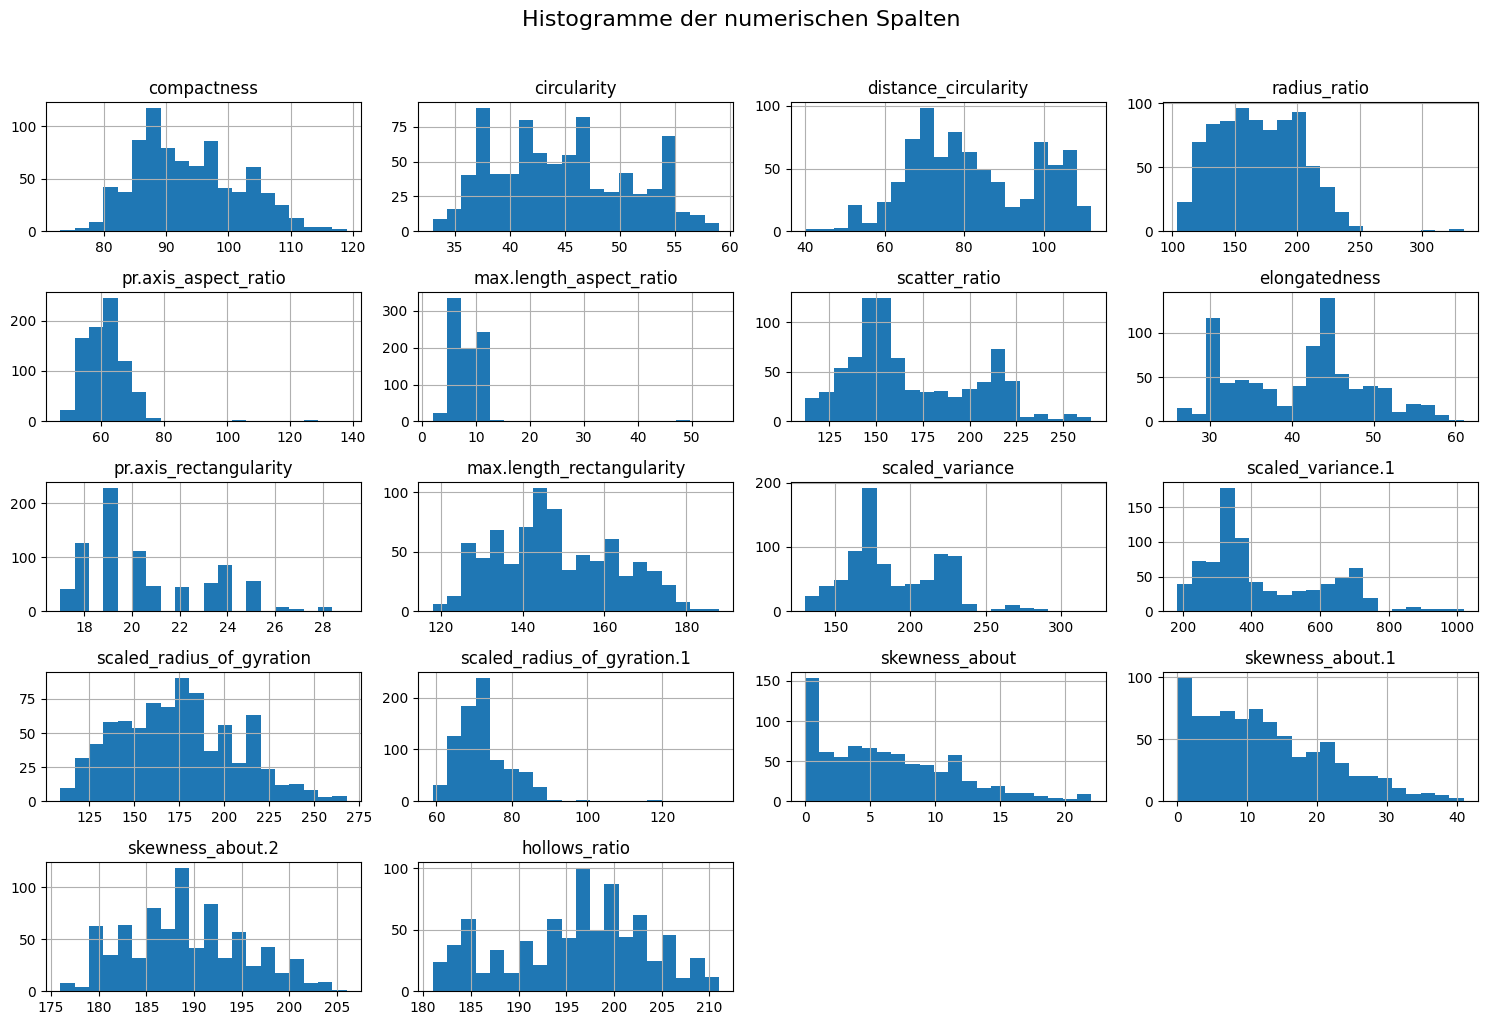


********** Visualisierung: Ausreißer (Boxplots) **********


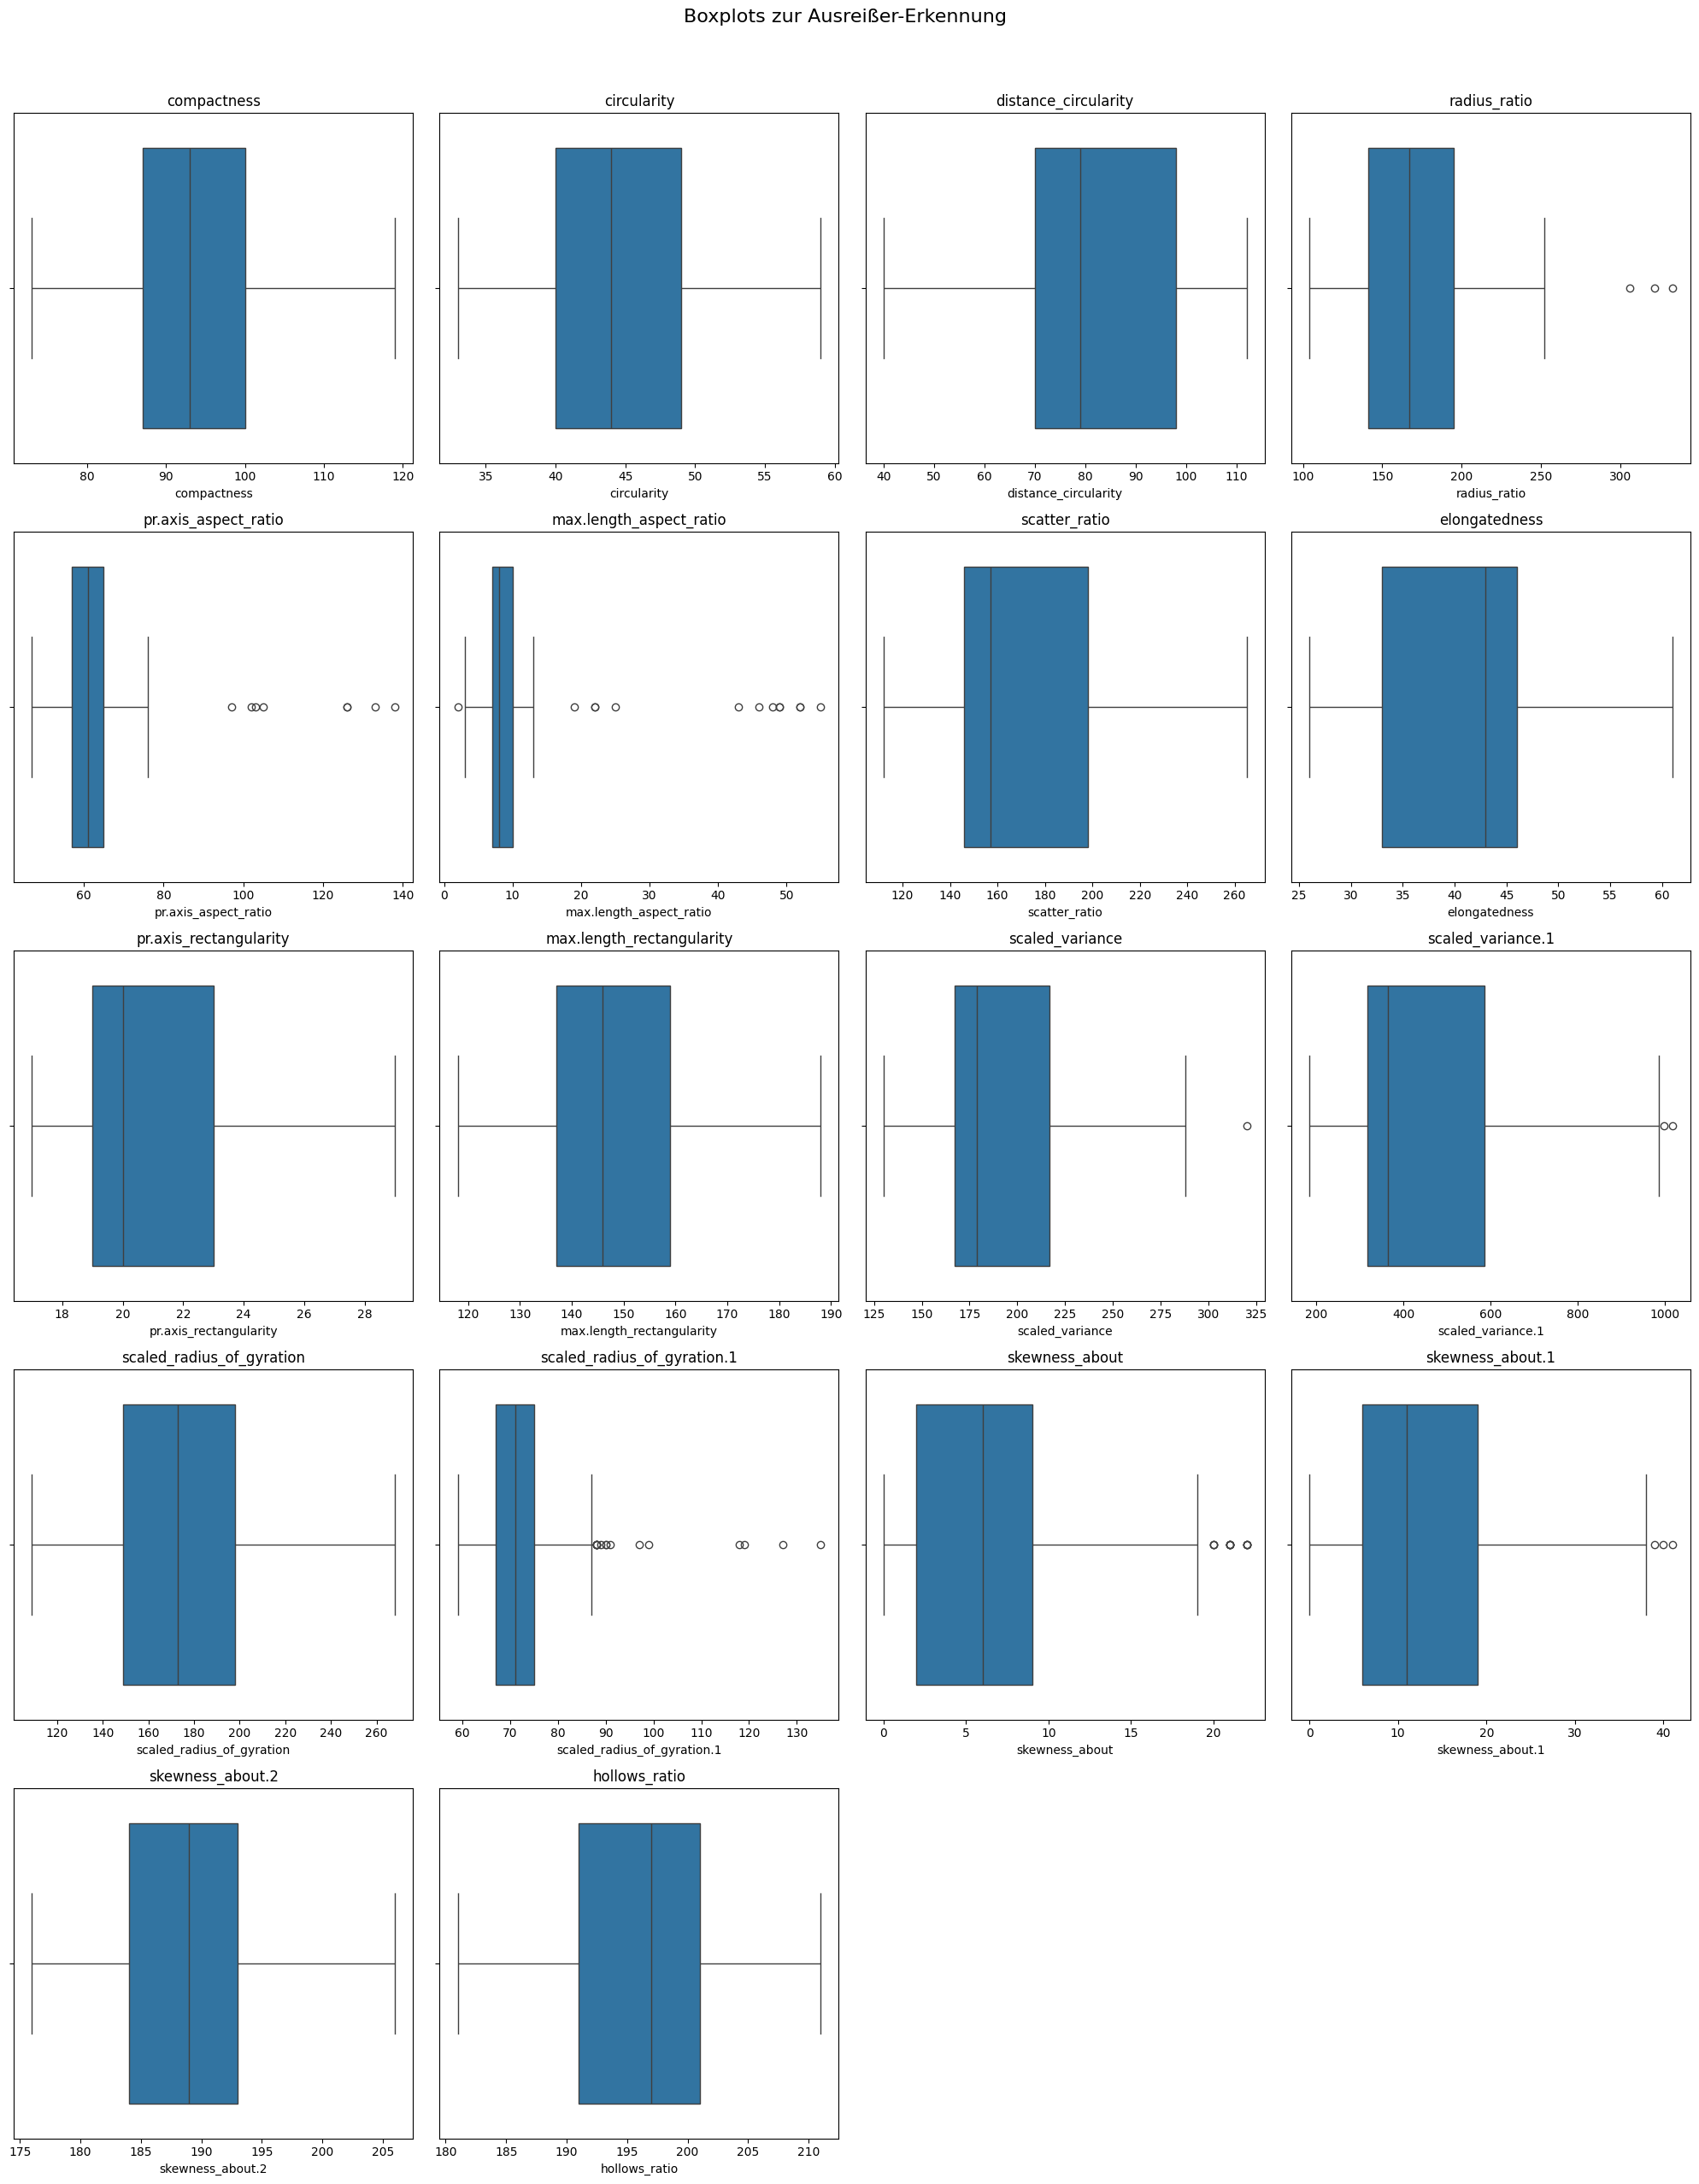


********** Visualisierung: Verteilung der kategorialen Features **********


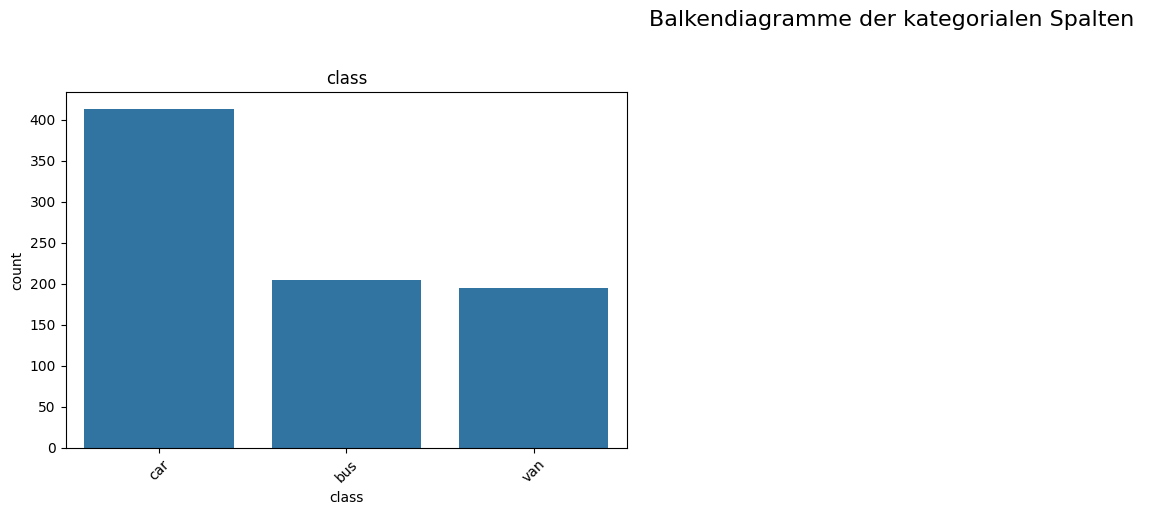


********** Visualisierung: Korrelationsmatrix **********


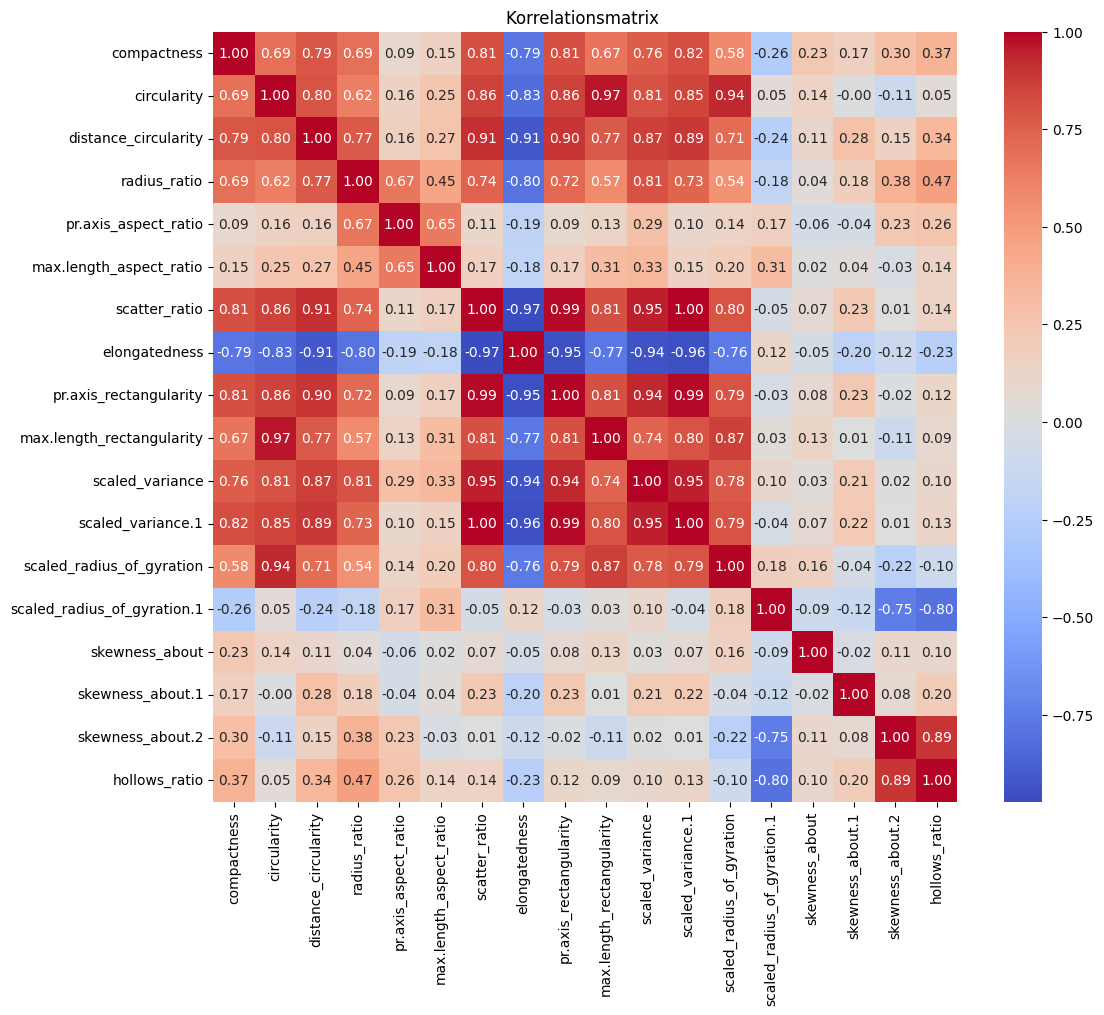

EDA abgeschlossen.


In [6]:
# 📊 ALLGEMEINE DATA VALIDATION
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(df, title=""):
    """
    Führt eine allgemeine explorative Datenanalyse (EDA) für ein DataFrame durch.

    Args:
        df (pd.DataFrame): Das DataFrame für die EDA.
        title (str): Ein optionaler Titel für die Plots.
    """
    print("="*40)
    print(f"Start der Explorativen Datenanalyse{f' für {title}' if title else ''}")
    print("="*40)

    # 1. Datenübersicht
    print("\n" + "*"*10, "Datenübersicht", "*"*10)
    print(f"Form des Datensatzes: {df.shape}")
    print("\nInformationen zum Datensatz:")
    df.info()

    # 2. Statistische Zusammenfassung
    print("\n" + "*"*10, "Statistische Zusammenfassung", "*"*10)
    print(df.describe(include='all').T)

    # 3. Untersuchung fehlender Werte
    print("\n" + "*"*10, "Fehlende Werte", "*"*10)
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    missing_summary = pd.DataFrame({'Missing Count': missing_data, 'Missing %': missing_percentage})
    print(missing_summary[missing_summary['Missing Count'] > 0])
    if missing_summary['Missing Count'].sum() == 0:
        print("Keine fehlenden Werte gefunden.")

    # 4. Verteilung der numerischen Features (Histogramme)
    print("\n" + "*"*10, "Visualisierung: Verteilung der numerischen Features", "*"*10)
    numeric_cols = df.select_dtypes(include=np.number).columns
    if not numeric_cols.empty:
        df[numeric_cols].hist(figsize=(15, 10), bins=20)
        plt.suptitle(f'Histogramme der numerischen Spalten {title}', y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()

    # 5. Boxplots zur Ausreißer-Erkennung
    print("\n" + "*"*10, "Visualisierung: Ausreißer (Boxplots)", "*"*10)
    if not numeric_cols.empty:
        num_cols = len(numeric_cols)
        fig, axes = plt.subplots(ncols=4, nrows=int(np.ceil(num_cols/4)), figsize=(20, 5 * int(np.ceil(num_cols/4))))
        axes = axes.flatten()
        for i, col in enumerate(numeric_cols):
            sns.boxplot(x=df[col], ax=axes[i])
            axes[i].set_title(col)
        for j in range(i + 1, len(axes)):
            axes[j].set_visible(False)
        plt.suptitle(f'Boxplots zur Ausreißer-Erkennung {title}', y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()

    # 6. Verteilung der kategorialen Features (Balkendiagramme)
    print("\n" + "*"*10, "Visualisierung: Verteilung der kategorialen Features", "*"*10)
    categorical_cols = df.select_dtypes(include='object').columns
    if not categorical_cols.empty:
        fig, axes = plt.subplots(ncols=3, nrows=int(np.ceil(len(categorical_cols)/3)), figsize=(18, 5 * int(np.ceil(len(categorical_cols)/3))))
        axes = axes.flatten()
        for i, col in enumerate(categorical_cols):
            sns.countplot(x=df[col], ax=axes[i], order=df[col].value_counts().index)
            axes[i].set_title(col)
            axes[i].tick_params(axis='x', rotation=45)
        for j in range(i + 1, len(axes)):
            axes[j].set_visible(False)
        plt.suptitle(f'Balkendiagramme der kategorialen Spalten {title}', y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()

    # 7. Korrelationsmatrix für numerische Features
    print("\n" + "*"*10, "Visualisierung: Korrelationsmatrix", "*"*10)
    if not numeric_cols.empty and len(numeric_cols) > 1:
        plt.figure(figsize=(12, 10))
        sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Korrelationsmatrix {title}')
        plt.show()
    else:
        print("Nicht genügend numerische Spalten für eine Korrelationsmatrix.")

    print("="*40)
    print("EDA abgeschlossen.")
    print("="*40)

perform_eda(df)

# Zwischen Speichern

In [7]:
# ⚙️ Exportieren des DataFrames als CSV-Datei
# ============================================================

import time
import pandas as pd
import os

# Automatic copy of df is not needed, but can be kept for safety
TEMP = df.copy()

# User input for filename
filename = input("Bitte Dateiname für Export eingeben (Enter für temporären Namen): ").strip()

# If no name is provided, create a temporary name
if not filename:
    timestamp = int(time.time())  # current UNIX timestamp
    filename = f"temp_export_{timestamp}.csv"

# Automatically add .csv extension if it's missing
if not filename.endswith(".csv"):
    filename += ".csv"

# Check if the file already exists and ask for confirmation
if os.path.exists(filename):
    overwrite = input(f"Die Datei '{filename}' existiert bereits. Möchten Sie sie überschreiben? (yes/no): ").lower()
    if overwrite != 'yes':
        print("Export abgebrochen.")
    else:
        # Save CSV to the local file system
        # index=False to prevent writing the pandas index to the CSV
        TEMP.to_csv(filename, index=False)
        print(f"\n'{filename}' wurde erfolgreich auf Ihrem lokalen Computer erstellt.")
else:
    # Save CSV to the local file system
    TEMP.to_csv(filename, index=False)
    print(f"\n'{filename}' wurde erfolgreich auf Ihrem lokalen Computer erstellt.")


'temp_export_1760099929.csv' wurde erfolgreich auf Ihrem lokalen Computer erstellt.


# Zwischen Laden

In [8]:
# ⚙️ Laden von CSV-Dateien mit Umgebungs-Erkennung
# ============================================================

import pandas as pd
import glob
import os
import warnings

# Erkennung der Umgebung (Google Colab oder lokal)
try:
    from google.colab import files
    COLAB_ENV = True
except ImportError:
    COLAB_ENV = False
    # Nur in lokaler Umgebung, da Tkinter dort benötigt wird
    try:
        from tkinter import filedialog
        from tkinter import Tk
    except ImportError:
        warnings.warn("Tkinter-Modul nicht gefunden. Dateiauswahlfenster wird nicht funktionieren.")

# Nutzer-Eingabe
choice = input("Möchten Sie eine Datei hochladen? (ja = hochladen, Enter = TEMP laden): ").strip().lower()

# Aktuellen Arbeitsbereich ausgeben
print(f"Aktueller Arbeitsbereich: {os.getcwd()}")

if choice == "ja":
    if COLAB_ENV:
        # Code für Google Colab
        print("\nGoogle Colab Umgebung erkannt. Bitte Datei hochladen.")
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]
        df = pd.read_csv(filename)
        print(f"\n'{filename}' wurde erfolgreich geladen.")
    else:
        # Code für lokale Umgebung mit Tkinter-Dateiauswahlfenster
        print("\nLokale Umgebung erkannt. Es öffnet sich ein Dateiauswahlfenster.")
        
        # Erstellen eines Tkinter-Root-Fensters und Ausblenden
        try:
            root = Tk()
            root.withdraw() 
            
            # Öffnen des Dateidialogs und Abrufen des Pfades
            file_path = filedialog.askopenfilename(
                title="Wählen Sie Ihre CSV-Datei",
                filetypes=(("CSV-Dateien", "*.csv"), ("Alle Dateien", "*.*"))
            )
            
            if file_path:
                df = pd.read_csv(file_path)
                print(f"\nDie Datei '{file_path}' wurde erfolgreich geladen.")
            else:
                print("Keine Datei ausgewählt.")
                df = None
        except Exception as e:
            print(f"Fehler beim Öffnen des Dateidialogs: {e}")
            df = None
else:
    # Statt neue Datei laden -> vorhandene TEMP nutzen
    try:
        # Dieser Teil des Codes setzt voraus, dass 'TEMP' bereits irgendwo definiert wurde.
        df = TEMP
        print("\nVorhandene TEMP-Kopie wurde geladen.")
    except NameError:
        raise ValueError("Keine TEMP-Kopie gefunden! Bitte zuerst eine Datei exportieren oder hochladen.")

Aktueller Arbeitsbereich: /Users/cristallagus/Desktop/GitHub/ml-clustering-unsupervised

Vorhandene TEMP-Kopie wurde geladen.


# Sie müssen also letztendlich ein Klassifizierungsmodell erstellen, das eine
# Fahrzeugklasse vorhersagt. Die Frage, die sich stellt: Was genau wird für
# dieses Projekt benötigt? Lassen Sie uns das im nächsten Abschnitt besprechen!

# Behandlung Für ML / Endscheidung welcher code passt dazu

In [ ]:
# ⚙️ ML BEREINIGUNG
# ============================================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
from typing import Dict, Union, Callable, List
import ipywidgets as widgets
from IPython.display import display, clear_output

# ============================================================
#           SE MANTIC-Erkennung
# ============================================================
def get_semantic_hints() -> Dict:
    """Gibt die vordefinierten semantischen Muster zurück."""
    return {
        'ID': {
            'keywords': {'id', 'session_id', 'trip_id', 'user_id', 'unique_id', 'kundennummer', 'bestellnr', 'order_id', 'artikelnummer'},
            'validation_func': lambda s: ((s.dropna().astype(str).apply(len) >= 5).any())
        },
        'Datum/Zeit': {
            'keywords': {'week', 'datum', 'zeit', 'date', 'time', 'start', 'end', 'birthdate', 'signup_date', 'check_in', 'check_out', 'departure', 'return', 'geburtstag', 'timestamp', 'creation_date', 'modified_date', 'erstellt'},
            'validation_func': lambda s: (pd.to_datetime(s.dropna(), errors='coerce').notna().all() or (s.dropna().astype(str).str.contains(r'[-_/]', na=False).any() and s.dropna().astype(str).str.contains(r'\d{4}', na=False).any()))
        },
        'Geometrisch': {
            'keywords': {'geom', 'geometry', 'shape', 'wkt', 'geojson', 'coordinates', 'location_data'},
            'validation_func': lambda s: (s.dropna().astype(str).str.contains(r'^(POINT|LINESTRING|POLYGON|MULTIPOINT|MULTILINESTRING|MULTIPOLYGON)\s*\(', regex=True, na=False).any() or s.dropna().astype(str).str.contains(r'{"type":\s*"(Point|LineString|Polygon|MultiPoint|MultiLineString|MultiPolygon)"', regex=True, na=False).any())
        },
        'Text (Kategorial)': {
            'keywords': {'city', 'country', 'länder', 'region', 'state', 'bundesland', 'zip', 'plz'},
            'validation_func': lambda s: s.dropna().nunique() >= 2 and (pd.api.types.is_string_dtype(s.dropna()) or isinstance(s.dropna().dtype, pd.CategoricalDtype))
        },
        'Text (Gender)': {
            'keywords': {'geschlecht', 'typ', 'category', 'art', 'gender','method','class'},
            'validation_func': lambda s: s.dropna().nunique() >= 2 and (pd.api.types.is_string_dtype(s.dropna()) or isinstance(s.dropna().dtype, pd.CategoricalDtype))
        },
        'Text (object)': {
            'keywords': {'airport', 'destination', 'origin', 'heimat', 'status'},
            'validation_func': lambda s: s.dropna().nunique() >= 2 and (pd.api.types.is_string_dtype(s.dropna()) or isinstance(s.dropna().dtype, pd.CategoricalDtype))
        },
        'Text (Freitext)': {
            'keywords': {'name', 'hotel', 'airline', 'beschreibung', 'kommentar', 'nachricht', 'adresse'},
            'validation_func': lambda s: pd.api.types.is_string_dtype(s.dropna()) or isinstance(s.dropna().dtype, pd.CategoricalDtype)
        },
        'Boolean': {
            'keywords': {'boolean', 'bool', 'booked', 'married', 'cancellation', 'children','discount', 'yes', 'no', 'ja', 'nein'},
            'validation_func': lambda s: (s.dropna().nunique() == 2) and (pd.api.types.is_bool_dtype(s.dropna()) or set(s.dropna().astype(str).str.lower().str.strip().unique()).issubset({'true', 'false', '1', '0', 'ja', 'nein', 'yes', 'no', 't', 'f', 'wahr', 'falsch'}))
        },
        'Float (Geografisch)': {
            'keywords': {'lat', 'lon', 'latitude', 'longitude'},
            'validation_func': lambda s: pd.to_numeric(s.dropna(), errors='coerce').notna().all() and (pd.to_numeric(s.dropna(), errors='coerce').astype(str).str.count(r'\.').all() or pd.api.types.is_float_dtype(s.dropna()))
        },
        'Float (Prozentsatz)': {
            'keywords': {'percent', 'pct', 'rate', 'discount', '%'},
            'validation_func': lambda s: (pd.to_numeric(s.dropna().astype(str).str.replace('%', ''), errors='coerce').dropna().between(0, 1).all() or pd.to_numeric(s.dropna().astype(str).str.replace('%', ''), errors='coerce').dropna().between(0, 100).all()) or pd.to_numeric(s.dropna().astype(str).str.replace('%', ''), errors='coerce').notna().all() and s.dropna().astype(str).str.replace('%', '').str.replace(',', '.').str.match(r'^\d{1,3}(\.\d{1,3})?$').all()
        },
        'Float (Waehrung)': {
            'keywords': {'preis', 'price', 'kosten', 'betrag', 'revenue', 'dollar', 'euro', 'yen', 'usd', 'eur', 'fare', 'chf', 'gbp', 'sek', 'jpy', '€', '£', '$'},
            'validation_func': lambda s: (pd.api.types.is_numeric_dtype(s.dropna()) or pd.to_numeric(s.dropna().astype(str).str.replace(',', '.'), errors='coerce').notna().all()) and s.dropna().nunique() > 2
        },
        'Integer': {
            'keywords': {'nb', 'anzahl', 'menge', 'stueck', 'stk', 'count', 'qty', 'seats', 'rooms', 'nights', 'bags', 'clicks', 'nummer', 'nr', 'quantity', 'val', 'rating', 'years_as_customer'},
            'validation_func': lambda s: pd.to_numeric(s.dropna(), errors='coerce').notna().all() and (pd.to_numeric(s.dropna(), errors='coerce').dropna().apply(lambda x: x.is_integer() if isinstance(x, float) else True).all())
        }
    }

def analyze_semantic_type(df: pd.DataFrame) -> Dict[str, str]:
    """
    Analysiert die semantischen Datentypen der Spalten und gibt sie als
    Wörterbuch zurück.
    """
    column_types = {}
    semantic_hints = get_semantic_hints()

    for col in df.columns:
        col_type = 'Unbekannt'
        col_series = df[col]
        col_name_lower = col.lower()

        # Priorisierte Überprüfung nach Keywords und Validierung
        found = False
        for sem_type, hints in semantic_hints.items():
            if any(keyword in col_name_lower for keyword in hints['keywords']):
                if hints['validation_func'](col_series):
                    col_type = sem_type
                    found = True
                    break
        
        # Fallback-Logik, wenn keine Keywords gefunden wurden
        if not found:
            if pd.api.types.is_numeric_dtype(col_series):
                if col_series.nunique() <= 2 and col_series.isin([0, 1]).all():
                    col_type = 'Boolean'
                elif col_series.dtype in ['int64', 'Int64', 'int32', 'Int32']:
                    col_type = 'Integer'
                else:
                    col_type = 'Numerisch'
            elif pd.api.types.is_string_dtype(col_series) or pd.api.types.is_categorical_dtype(col_series):
                if col_series.nunique() < 50:
                    col_type = 'Text (Kategorial)'
                else:
                    col_type = 'Text (Freitext)'

        column_types[col] = col_type

    print("🔍 Semantische Spalten-Typen erkannt:")
    for col, sem_type in column_types.items():
        print(f"  - '{col}': {sem_type}")
    return column_types

def handle_outliers_iqr(df: pd.DataFrame) -> pd.DataFrame:
    """
    Behandelt Ausreißer in numerischen Spalten mithilfe der IQR-Methode (Capping).
    """
    df_temp = df.copy()
    numeric_cols = df_temp.select_dtypes(include=np.number).columns.tolist()
    
    if not numeric_cols:
        print("ℹ️ Keine numerischen Spalten gefunden, Ausreißer-Behandlung übersprungen.")
        return df_temp

    print("📊 Start der Ausreißer-Behandlung (Capping) nach IQR-Methode...")
    for col in numeric_cols:
        Q1 = df_temp[col].quantile(0.25)
        Q3 = df_temp[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_count = ((df_temp[col] < lower_bound) | (df_temp[col] > upper_bound)).sum()
        if outliers_count > 0:
            df_temp[col] = np.where(df_temp[col] < lower_bound, lower_bound, df_temp[col])
            df_temp[col] = np.where(df_temp[col] > upper_bound, upper_bound, df_temp[col])
            print(f"✅ {outliers_count} Ausreißer in Spalte '{col}' behandelt.")
        else:
            print(f"ℹ️ Keine Ausreißer in Spalte '{col}' gefunden.")
    print("✅ Ausreißer-Behandlung abgeschlossen.")
    return df_temp

def preprocess_ml_data(df: pd.DataFrame, target_column_name: str) -> (pd.DataFrame, np.ndarray, LabelEncoder):
    """
    Führt die Datenbereinigung und Vorverarbeitung für ML durch,
    basierend auf semantischen Typen.
    """
    df_ML = df.copy()

    # Zielspalte und Features trennen
    if target_column_name not in df_ML.columns:
        raise ValueError(f"❌ Zielspalte '{target_column_name}' nicht im DataFrame gefunden.")
    
    y = df_ML[target_column_name]
    X = df_ML.drop(columns=[target_column_name])
    
    # Semantische Typen analysieren
    semantic_types = analyze_semantic_type(X)

    # Spaltenlisten erstellen basierend auf den semantischen Typen
    numeric_cols = [col for col, sem_type in semantic_types.items() if sem_type in ['Numerisch', 'Integer', 'Float (Geografisch)', 'Float (Prozentsatz)', 'Float (Waehrung)']]
    categorical_cols = [col for col, sem_type in semantic_types.items() if sem_type in ['Text (Kategorial)', 'Text (Gender)', 'Text (object)', 'Boolean']]
    irrelevant_cols = [col for col, sem_type in semantic_types.items() if sem_type in ['ID', 'Datum/Zeit', 'Geometrisch', 'Text (Freitext)']]
    
    # Irrelevante Spalten entfernen
    X.drop(columns=irrelevant_cols, errors='ignore', inplace=True)
    print("✅ Irrelevante Spalten (basierend auf semantischer Analyse) entfernt.")
    
    # Standardisierung und Kodierung anwenden
    if numeric_cols:
        imputer_numeric = SimpleImputer(strategy='median')
        X[numeric_cols] = imputer_numeric.fit_transform(X[numeric_cols])
        scaler = StandardScaler()
        X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
        print("✅ Numerische Spalten wurden imputiert und standardisiert.")
    else:
        print("ℹ️ Keine numerischen Spalten für die Standardisierung gefunden.")
        
    if categorical_cols:
        X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
        print("✅ Kategoriale Spalten wurden kodiert (One-Hot-Encoding).")
    else:
        print("ℹ️ Keine kategorialen Spalten für die Kodierung gefunden.")
    
    # Zielvariable kodieren
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    print("✅ Zielvariable in numerische Werte kodiert (LabelEncoder).")
    
    return X, y_encoded, le

def run_ml_preprocessing(df: pd.DataFrame):
    """
    Führt die gesamte ML-Vorbereitung interaktiv aus.
    """
    # Schritt 1: Klassifizierung der Spalten
    # Führen Sie eine schnelle semantische Analyse durch, um Spaltenoptionen zu erhalten.
    # Wir machen dies auf einer Kopie, um die Original-DF nicht zu manipulieren.
    temp_df = df.copy()
    classified_types = analyze_semantic_type(temp_df)
    
    # Filtern der Spalten, die als Lernspalte in Frage kommen
    target_col_options = [col for col, sem_type in classified_types.items() if sem_type in ['Text (Kategorial)', 'Text (Gender)', 'Text (object)', 'Boolean', 'Integer', 'Numerisch']]

    if not target_col_options:
        print("❌ Keine geeigneten Spalten für die Zielvariable gefunden.")
        return

    # Schritt 2: Interaktive Auswahl der Zielspalte
    target_dropdown = widgets.Dropdown(
        options=target_col_options,
        description='Zielvariable:',
        style={'description_width': 'initial'}
    )
    
    button = widgets.Button(
        description='Daten verarbeiten',
        button_style='success',
        tooltip='Klicken, um die Vorverarbeitung zu starten'
    )
    
    output = widgets.Output()

    def on_button_clicked(b):
        with output:
            clear_output()
            selected_target_column = target_dropdown.value
            
            if not selected_target_column:
                print("⚠️ Bitte wählen Sie eine Zielvariable aus.")
                return

            try:
                # Schritt 3: Ausführung der Datenbereinigung und Vorverarbeitung
                df_ML = df.copy()
                df_after_outliers = handle_outliers_iqr(df_ML)
                X_processed, y_encoded, label_encoder = preprocess_ml_data(df_after_outliers, selected_target_column)

                print("--- ✅ DATEN FÜR MODELLIERUNG VORBEREITET ---")
                print(f"Größe der Feature-Matrix (X): {X_processed.shape}")
                print(f"Größe des Zielvektors (y): {y_encoded.shape}")
                print("--- 🏁 ENDE DER DATENBEREINIGUNG ---")

            except ValueError as e:
                print(f"❌ Fehler bei der Verarbeitung: {e}")
            except Exception as e:
                print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")
    
    button.on_click(on_button_clicked)
    
    display(widgets.VBox([target_dropdown, button, output]))

# Haupt-Aufruf, um den Prozess zu starten
print("--- ⚙️ START DES INTERAKTIVEN BEREINIGUNGSPROZESSES ---")
run_ml_preprocessing(df)

--- ⚙️ START DES INTERAKTIVEN BEREINIGUNGSPROZESSES ---
🔍 Semantische Spalten-Typen erkannt:
  - 'compactness': Integer
  - 'circularity': Numerisch
  - 'distance_circularity': Numerisch
  - 'radius_ratio': Numerisch
  - 'pr.axis_aspect_ratio': Numerisch
  - 'max.length_aspect_ratio': Integer
  - 'scatter_ratio': Numerisch
  - 'elongatedness': Float (Geografisch)
  - 'pr.axis_rectangularity': Numerisch
  - 'max.length_rectangularity': Integer
  - 'scaled_variance': Numerisch
  - 'scaled_variance.1': Numerisch
  - 'scaled_radius_of_gyration': Numerisch
  - 'scaled_radius_of_gyration.1': Numerisch
  - 'skewness_about': Numerisch
  - 'skewness_about.1': Numerisch
  - 'skewness_about.2': Numerisch
  - 'hollows_ratio': Integer
  - 'class': Text (Gender)


In [ ]:
# 📊 ALLGEMEINE  ScaterPlot mit automatische 2 PC verteilung
# =======================================================

import pandas as pd
import numpy as np
import warnings
from typing import List, Dict, Union
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

# Deaktiviere zukünftige Pandas-Warnungen, die bei der Typkonvertierung auftreten können
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# =======================================================
# ====== 1. Spaltenklassifizierung nach Datentyp ======
# =======================================================
import pandas as pd
from typing import List, Dict

def classify_columns_by_type(df: pd.DataFrame) -> Dict[str, List[str]]:
    """
    Klassifiziert die Spalten eines DataFrame rein basierend auf ihrem Datentyp.

    Args:
        df: Das zu klassifizierende Pandas DataFrame.

    Returns:
        Ein Dictionary, das Spaltentypen auf eine Liste der zugehörigen Spaltennamen abbildet.
    """
    categorical_columns: List[str] = []
    numerical_columns: List[str] = []

    for column in df.columns:
        col_dtype = df[column].dtype

        if pd.api.types.is_numeric_dtype(col_dtype):
            numerical_columns.append(column)
        elif pd.api.types.is_object_dtype(col_dtype) or pd.api.types.is_categorical_dtype(col_dtype):
            categorical_columns.append(column)

    return {
        'categorical': categorical_columns,
        'numerical': numerical_columns,
    }

# =======================================================
# ====== 2. Interaktive Benutzeroberfläche mit ipywidgets ======
# =======================================================

# Klassifizieren der Spalten des geladenen Datenrahmens
# HINWEIS: Ersetzen Sie 'classify_columns' durch den korrekten Funktionsnamen 'classify_columns_by_type'
classified_cols = classify_columns_by_type(df)

# Dropdown-Menü für die Zielvariable (Farbe) erstellen
target_col_options = classified_cols['categorical'] + classified_cols['numerical']

target_dropdown = widgets.Dropdown(
    options=target_col_options,
    description='Zielvariable (Farbe):'
)

button = widgets.Button(
    description='PCA Plot erstellen',
    button_style='success',
    tooltip='Klicken Sie, um den PCA-Plot zu erstellen'
)

output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output(wait=True)
        try:
            selected_target_col = target_dropdown.value

            numerical_features = classified_cols['numerical']

            if len(numerical_features) < 2:
                print("Es werden mindestens 2 numerische Spalten für die PCA benötigt.")
                return

            df_cleaned = df.dropna(subset=[selected_target_col])
            X = df_cleaned[numerical_features].values
            y = df_cleaned[selected_target_col].values

            # Imputation der fehlenden Werte
            imputer = SimpleImputer(strategy='mean')
            X_imputed = imputer.fit_transform(X)

            # Skalieren der Daten
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X_imputed)

            # PCA auf 2 Komponenten reduzieren
            pca = PCA(n_components=2, random_state=42)
            X_pca = pca.fit_transform(X_scaled)

            # Visualisierung
            plt.figure(figsize=(5, 4))

            sns.scatterplot(
                x=X_pca[:, 0],
                y=X_pca[:, 1],
                hue=y,
                palette="tab10"
            )

            plt.title("PCA Projektion: PC1 vs. PC2", fontsize=15)
            plt.xlabel("PC1", fontsize=12)
            plt.ylabel("PC2", fontsize=12)
            plt.legend(title=selected_target_col, loc='best')
            plt.grid(True)
            plt.show()

        except Exception as e:
            print(f"Ein Fehler ist aufgetreten: {e}")

button.on_click(on_button_clicked)

# Widgets anzeigen
print("Wählen Sie die Spalte zur Einfärbung der PCA-Punkte aus:")
display(widgets.VBox([
    target_dropdown,
    button,
    output
]))

Wählen Sie die Spalte zur Einfärbung der PCA-Punkte aus:


# Überwachtes Lernen

In [17]:
# ⚙️ ML MODELLIERUNG
# ============================================================
import pandas as pd
import numpy as np
import warnings
import sys
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

# Optionale Bibliotheken
try:
    from xgboost import XGBClassifier
    has_xgb = True
except ImportError:
    has_xgb = False

try:
    from lightgbm import LGBMClassifier
    has_lgbm = True
except ImportError:
    has_lgbm = False

try:
    from catboost import CatBoostClassifier
    has_catboost = True
except ImportError:
    has_catboost = False

warnings.filterwarnings("ignore")
print("Alle notwendigen Bibliotheken erfolgreich importiert!")
print('*' * 50)

# ====== DATEN PRÜFEN UND ZUWEISEN ======
print(' * * * * * * * * * *', '[DATEN PRÜFEN UND ZUWEISEN]', ' * * * * * * * * * *')
# Weist das Haupt-DataFrame (df) der temporären Variable (df_temp) zu,
# um Kompatibilität mit dem bereitgestellten Code zu gewährleisten.
df_temp = df

# =====================================
print('*' * 50)
# =======================================================
#    1. Spaltenklassifizierung nach Typ tabelarisch
# =======================================================
def classify_columns_by_type(df: pd.DataFrame):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    return {'categorical': categorical_columns, 'numerical': numerical_columns}

# === 1. Features und Zielvariable trennen (mit Dropdown) ===
print("--- 🛠️ Daten für das Modell vorbereiten ---")
classified_cols = classify_columns_by_type(df_temp)
kategorische_spalten = classified_cols['categorical']

if not kategorische_spalten:
    raise ValueError("❌ Keine kategoriale Spalte im DataFrame gefunden.")

print("\nFolgende Spalten sind vom Typ 'object' oder 'category':")
for i, col in enumerate(kategorische_spalten):
    print(f"  {i+1}. {col}")

# Dropdown-Menü und OK-Button erstellen
ziel_dropdown = widgets.Dropdown(
    options=kategorische_spalten,
    description='Zielvariable:',
    disabled=False,
)

ok_button = widgets.Button(
    description='OK',
    button_style='success',
    tooltip='Ausgewählte Spalte bestätigen'
)

output_widget = widgets.Output()

def on_ok_button_clicked(b):
    with output_widget:
        clear_output(wait=True)
        try:
            zielvariable_name = ziel_dropdown.value

            y = df_temp[zielvariable_name]
            X = df_temp.drop(columns=[zielvariable_name])

            print(f"\n✅ Zielvariable: '{y.name}' (Datentyp: {y.dtype})")
            print(f"Anzahl der Features: {X.shape[1]}")

            # === 2. One-Hot-Encoding für Features ===
            kategorische_spalten_in_X = X.select_dtypes(include=['object', 'category']).columns
            if not kategorische_spalten_in_X.empty:
                X = pd.get_dummies(X, columns=kategorische_spalten_in_X, drop_first=True)
                print("\n✅ Kategorische Spalten in X wurden kodiert (One-Hot-Encoding).")
            else:
                print("\nℹ️ Keine kategorischen Spalten in X gefunden.")

            # === 3. Zielvariable kodieren ===
            if y.dtype == 'object' or y.dtype.name == 'category':
                le = LabelEncoder()
                y_encoded = le.fit_transform(y)
                print("\n✅ Zielvariable in numerische Werte kodiert (LabelEncoder).")
                for i, class_name in enumerate(le.classes_):
                    print(f"  '{class_name}' -> {i}")
            else:
                le = None
                y_encoded = y
                print("\nℹ️ Zielvariable bereits numerisch, keine Kodierung erforderlich.")

            # === 4. Konsistenzprüfung vor Split ===
            print(f"\n--- Konsistenzprüfung vor Train/Test-Split ---")
            if X.shape[0] != y_encoded.shape[0]:
                raise ValueError(f"❌ Inkonsistente Anzahl Samples: X={X.shape[0]}, y={y_encoded.shape[0]}")
            else:
                print("✅ Shapes konsistent.")

            # === 5. Train/Test-Split ===
            X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
            print(f"\nX_train: {X_train.shape}, X_test: {X_test.shape}")
            print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

            # === 6. Modelltraining und Bewertung ===
            print("\n--- 🧠 Modelle trainieren und bewerten ---")
            modelle = {
                "Logistische Regression": LogisticRegression(max_iter=500),
                "KNN": KNeighborsClassifier(),
                "Entscheidungsbaum": DecisionTreeClassifier(),
                "Random Forest": RandomForestClassifier(),
                "SVM": SVC(probability=True),
                "Naive Bayes": GaussianNB(),
                "Gradient Boosting": GradientBoostingClassifier(),
                "AdaBoost": AdaBoostClassifier(),
                "Neuronales Netz (MLP)": MLPClassifier(max_iter=500),
                "Extra Trees": ExtraTreesClassifier(),
                "Bagging": BaggingClassifier(),
                "SGD": SGDClassifier(loss="log_loss"),
                "Ridge": RidgeClassifier()
            }

            if has_xgb:
                modelle["XGBoost"] = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False)
            if has_lgbm:
                modelle["LightGBM"] = LGBMClassifier(verbose=-1)
            if has_catboost:
                modelle["CatBoost"] = CatBoostClassifier(verbose=0)

            ergebnisse = {}
            for name, model in modelle.items():
                print(f"Starte Training für: {name}...")
                try:
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    acc = accuracy_score(y_test, y_pred)
                    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
                    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
                    roc_auc = np.nan
                    if hasattr(model, "predict_proba"):
                        y_pred_proba = model.predict_proba(X_test)
                        if y_pred_proba.shape[1] == 2:
                            roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
                    scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')
                    ergebnisse[name] = {
                        'accuracy': acc, 'precision': prec, 'recall': rec, 'f1_score': f1,
                        'roc_auc': roc_auc, 'cv_accuracy': np.mean(scores), 'model': model
                    }
                    print(f"✅ Training für {name} abgeschlossen.")
                except Exception as e:
                    print(f"❌ Modell {name} konnte nicht trainiert werden: {e}")

            # Sortieren und Filter
            ergebnisse = dict(sorted(ergebnisse.items(), key=lambda x: x[1]['cv_accuracy'], reverse=True))
            threshold = 0.6
            gefilterte_ergebnisse = {name: metrics for name, metrics in ergebnisse.items() if metrics['cv_accuracy'] >= threshold}

            # Übersicht
            print("\n📊 Ergebnisse der Modelle (sortiert nach CV-Accuracy):")
            for name, metrics in ergebnisse.items():
                roc_auc_display = f"{metrics['roc_auc']:.3f}" if not np.isnan(metrics['roc_auc']) else "N/A"
                print(f"{name:20s} | Accuracy: {metrics['accuracy']:.3f} | CV-Accuracy: {metrics['cv_accuracy']:.3f} | ROC-AUC: {roc_auc_display}")

            # Bestes Modell auswählen
            if gefilterte_ergebnisse:
                best_model_name, best_metrics = next(iter(gefilterte_ergebnisse.items()))
                best_model = best_metrics['model']
                print(f"\n🏆 Bestes Modell unter den geeigneten: {best_model_name}")
                best_model.fit(X, y_encoded)

                # Balkendiagramm
                namen = list(gefilterte_ergebnisse.keys())
                test_acc = [metrics['accuracy'] for metrics in gefilterte_ergebnisse.values()]
                cv_acc = [metrics['cv_accuracy'] for metrics in gefilterte_ergebnisse.values()]
                fig, ax = plt.subplots(figsize=(10, 6))
                y_pos = np.arange(len(namen))
                bar_width = 0.35
                ax.barh(y_pos - bar_width/2, test_acc, height=bar_width, label="Test-Genauigkeit", color="skyblue")
                ax.barh(y_pos + bar_width/2, cv_acc, height=bar_width, label="CV-Genauigkeit", color="orange")
                ax.set_yticks(y_pos)
                ax.set_yticklabels(namen)
                ax.set_xlim(0.0, 1.0)
                ax.set_xlabel("Genauigkeit")
                ax.set_title("Modellvergleich – Klassifikation (CV-Genauigkeit >= 0.6)")
                ax.legend()
                for i, v in enumerate(test_acc):
                    ax.text(v + 0.01, i - bar_width/2, f"{v:.2f}", va="center")
                for i, v in enumerate(cv_acc):
                    ax.text(v + 0.01, i + bar_width/2, f"{v:.2f}", va="center")
                plt.tight_layout()
                plt.show()

                # Konfusionsmatrix auf Testdaten
                y_pred_test = best_model.predict(X_test)
                if le is not None:
                    display_labels = le.classes_
                else:
                    display_labels = np.unique(np.concatenate((y_test, y_pred_test)))
                cm = confusion_matrix(y_test, y_pred_test, labels=np.arange(len(display_labels)))
                disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
                disp.plot(cmap="Blues", values_format="d")
                plt.title(f"Konfusionsmatrix – {best_model_name}")
                plt.show()

                # --- 📋 Liste falsch klassifizierter Zeilen ---
                y_pred_test = best_model.predict(X_test)
                if le is not None:
                    y_test_decoded = le.inverse_transform(y_test)
                    y_pred_decoded = le.inverse_transform(y_pred_test)
                else:
                    y_test_decoded = y_test
                    y_pred_decoded = y_pred_test

                fehler_df = X_test.copy()
                fehler_df["Echte_Klasse"] = y_test_decoded
                fehler_df["Vorhergesagte_Klasse"] = y_pred_decoded
                fehler_df = fehler_df[fehler_df["Echte_Klasse"] != fehler_df["Vorhergesagte_Klasse"]]

                print("\n--- 📋 Falsch klassifizierte Zeilen ---")
                if fehler_df.empty:
                    print("✅ Alle Testdaten korrekt klassifiziert!")
                else:
                    print(f"❌ {len(fehler_df)} falsch klassifizierte Zeilen gefunden.")
                    print(fehler_df.head(10))

                # --- 📋 Vergleich echte Objekte aus df vs. Modellvorhersage ---
                y_pred_all = best_model.predict(X)
                if le is not None:
                    y_true_all = le.inverse_transform(y_encoded)
                    y_pred_all = le.inverse_transform(y_pred_all)
                else:
                    y_true_all = y_encoded
                    y_pred_all = y_pred_all

                vergleich_df = X.copy()
                vergleich_df["Echte_Klasse_df"] = y_true_all
                vergleich_df["Vorhergesagte_Klasse"] = y_pred_all
                abweichungen_df = vergleich_df[vergleich_df["Echte_Klasse_df"] != vergleich_df["Vorhergesagte_Klasse"]]

                print("\n--- 📋 Vergleich echte Objekte aus df vs. Modellvorhersage ---")
                if abweichungen_df.empty:
                    print("✅ Modell sieht alle Objekte gleich wie im Datensatz definiert!")
                else:
                    print(f"❌ {len(abweichungen_df)} Abweichungen gefunden.")
                    print(abweichungen_df.head(20))

                # Statistik der Abweichungen pro Klasse
                if not abweichungen_df.empty:
                    gesamt_pro_klasse = pd.Series(y_true_all).value_counts().sort_index()
                    fehler_pro_klasse = abweichungen_df["Echte_Klasse_df"].value_counts().sort_index()
                    prozent_fehler = (fehler_pro_klasse / gesamt_pro_klasse * 100).round(2)
                    klasse_statistik = pd.DataFrame({
                        "Gesamtanzahl": gesamt_pro_klasse,
                        "Fehleranzahl": fehler_pro_klasse,
                        "Fehler_%": prozent_fehler
                    }).fillna(0)
                    print("\n--- 📊 Abweichungen pro Klasse ---")
                    print(klasse_statistik)
                else:
                    print("✅ Keine Abweichungen, alle Objekte korrekt erkannt!")

                print("\n--- 🏁 Modellanalyse abgeschlossen ---")

        except Exception as e:
            print(f"Ein Fehler ist aufgetreten: {e}")

ok_button.on_click(on_ok_button_clicked)

# Widgets anzeigen
print("\nBitte wählen Sie die Zielvariable aus und klicken Sie auf OK.")
display(widgets.VBox([
    ziel_dropdown,
    ok_button,
    output_widget
]))
# =======================================================
#       1. Spaltenklassifizierung nach Typ PCA 2D
# =======================================================
def classify_columns_by_type(df: pd.DataFrame):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    return {'categorical': categorical_columns, 'numerical': numerical_columns}

# === 1. Features und Zielvariable trennen (mit Dropdown) ===
print("--- 🛠️ Daten für das Modell vorbereiten PCA 2D---")
classified_cols = classify_columns_by_type(df_temp)
kategorische_spalten = classified_cols['categorical']

if not kategorische_spalten:
    raise ValueError("❌ Keine kategoriale Spalte im DataFrame gefunden.")

print("\nFolgende Spalten sind vom Typ 'object' oder 'category':")
for i, col in enumerate(kategorische_spalten):
    print(f"  {i+1}. {col}")

# Dropdown-Menü und OK-Button erstellen
ziel_dropdown = widgets.Dropdown(
    options=kategorische_spalten,
    description='Zielvariable:',
    disabled=False,
)

ok_button = widgets.Button(
    description='OK',
    button_style='success',
    tooltip='Ausgewählte Spalte bestätigen'
)

output_widget = widgets.Output()

def on_ok_button_clicked(b):
    with output_widget:
        clear_output(wait=True)
        try:
            zielvariable_name = ziel_dropdown.value

            y = df_temp[zielvariable_name]
            X = df_temp.drop(columns=[zielvariable_name])

            print(f"\n✅ Zielvariable: '{y.name}' (Datentyp: {y.dtype})")
            print(f"Anzahl der Features: {X.shape[1]}")

            # === 2. One-Hot-Encoding für Features ===
            kategorische_spalten_in_X = X.select_dtypes(include=['object', 'category']).columns
            if not kategorische_spalten_in_X.empty:
                X = pd.get_dummies(X, columns=kategorische_spalten_in_X, drop_first=True)
                print("\n✅ Kategorische Spalten in X wurden kodiert (One-Hot-Encoding).")
            else:
                print("\nℹ️ Keine kategorischen Spalten in X gefunden.")

            # === 3. Zielvariable kodieren ===
            if y.dtype == 'object' or y.dtype.name == 'category':
                le = LabelEncoder()
                y_encoded = le.fit_transform(y)
                print("\n✅ Zielvariable in numerische Werte kodiert (LabelEncoder).")
                for i, class_name in enumerate(le.classes_):
                    print(f"  '{class_name}' -> {i}")
            else:
                le = None
                y_encoded = y
                print("\nℹ️ Zielvariable bereits numerisch, keine Kodierung erforderlich.")

            # === 4. Konsistenzprüfung vor Split ===
            print(f"\n--- Konsistenzprüfung vor Train/Test-Split ---")
            if X.shape[0] != y_encoded.shape[0]:
                raise ValueError(f"❌ Inkonsistente Anzahl Samples: X={X.shape[0]}, y={y_encoded.shape[0]}")
            else:
                print("✅ Shapes konsistent.")

            # === 5. Train/Test-Split ===
            X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
            print(f"\nX_train: {X_train.shape}, X_test: {X_test.shape}")
            print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

            # === 6. Modelltraining und Bewertung (interaktiver Teil) ===
            print("\n--- 🧠 Modelle trainieren und bewerten ---")
            modelle = {
                "Logistische Regression": LogisticRegression(max_iter=500),
                "KNN": KNeighborsClassifier(),
                "Entscheidungsbaum": DecisionTreeClassifier(),
                "Random Forest": RandomForestClassifier(),
                "SVM": SVC(probability=True),
                "Naive Bayes": GaussianNB(),
                "Gradient Boosting": GradientBoostingClassifier(),
                "AdaBoost": AdaBoostClassifier(),
                "Neuronales Netz (MLP)": MLPClassifier(max_iter=500),
                "Extra Trees": ExtraTreesClassifier(),
                "Bagging": BaggingClassifier(),
                "SGD": SGDClassifier(loss="log_loss"),
                "Ridge": RidgeClassifier()
            }

            if has_xgb:
                modelle["XGBoost"] = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False)
            if has_lgbm:
                modelle["LightGBM"] = LGBMClassifier(verbose=-1)
            if has_catboost:
                modelle["CatBoost"] = CatBoostClassifier(verbose=0)

            # Dropdown-Menü für die Modellauswahl erstellen
            modell_dropdown = widgets.Dropdown(
                options=list(modelle.keys()),
                description='Modell auswählen:',
                disabled=False,
                style={'description_width': 'initial'}
            )
            train_button = widgets.Button(
                description='Modell trainieren',
                button_style='primary',
                tooltip='Ausgewähltes Modell trainieren und bewerten'
            )
            output_modell_widget = widgets.Output()

            def on_train_button_clicked(b):
                with output_modell_widget:
                    clear_output(wait=True)
                    try:
                        selected_model_name = modell_dropdown.value
                        model = modelle[selected_model_name]

                        print(f"Starte Training für: {selected_model_name}...")

                        # Cross-Validation zur Bewertung der Modellleistung
                        scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')
                        print(f"✅ Cross-Validation (5-fold) abgeschlossen.")
                        print(f"   CV-Genauigkeit: {np.mean(scores):.3f} (+/- {np.std(scores):.3f})")

                        # Modell auf dem gesamten Datensatz trainieren
                        model.fit(X, y_encoded)
                        print(f"✅ Training des Modells '{selected_model_name}' auf dem gesamten Datensatz abgeschlossen.")

                        # --- Visualisierung der Ergebnisse ---
                        print("\n--- 🎨 Visualisierung der Modellvorhersage (PCA) ---")

                        # Reduzieren Sie die Dimensionen mit PCA auf 2
                        pca = PCA(n_components=2)
                        X_pca = pca.fit_transform(X)

                        # Erstellen der Vorhersagen für den gesamten Datensatz
                        y_pred_all = model.predict(X)

                        # Die tatsächliche und die vorhergesagte Klasse in einem DataFrame zusammenfassen
                        plot_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
                        plot_df['Echte_Klasse'] = y_encoded
                        plot_df['Vorhergesagte_Klasse'] = y_pred_all

                        # Labels für die Legende vorbereiten
                        if le is not None:
                            class_labels = le.classes_
                        else:
                            class_labels = np.unique(y_encoded)

                        # === Scatter Plots erstellen ===
                        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

                        # Plot 1: Tatsächliche Klassen
                        sns.scatterplot(
                            x='PC1',
                            y='PC2',
                            hue='Echte_Klasse',
                            data=plot_df,
                            palette='viridis',
                            legend='full',
                            ax=ax1
                        )
                        ax1.set_title('Tatsächliche Klassen (PCA 2D)')
                        ax1.set_xlabel('Hauptkomponente 1')
                        ax1.set_ylabel('Hauptkomponente 2')

                        # Plot 2: Vorhergesagte Klassen
                        sns.scatterplot(
                            x='PC1',
                            y='PC2',
                            hue='Vorhergesagte_Klasse',
                            data=plot_df,
                            palette='viridis',
                            legend='full',
                            ax=ax2
                        )
                        ax2.set_title(f'Vorhergesagte Klassen von {selected_model_name} (PCA 2D)')
                        ax2.set_xlabel('Hauptkomponente 1')
                        ax2.set_ylabel('Hauptkomponente 2')

                        # Legende anpassen
                        handles1, labels1 = ax1.get_legend_handles_labels()
                        handles2, labels2 = ax2.get_legend_handles_labels()

                        if le is not None:
                            labels_decoded = le.inverse_transform([int(float(l)) for l in labels1])
                            ax1.legend(handles=handles1, labels=labels_decoded, title="Echte Klassen")

                            labels_decoded_pred = le.inverse_transform([int(float(l)) for l in labels2])
                            ax2.legend(handles=handles2, labels=labels_decoded_pred, title="Vorhergesagte Klassen")

                        plt.tight_layout()
                        plt.show()

                        # --- Konfusionsmatrix ---
                        y_pred_test = model.predict(X_test)
                        if le is not None:
                            display_labels = le.classes_
                        else:
                            display_labels = np.unique(np.concatenate((y_test, y_pred_test)))
                        cm = confusion_matrix(y_test, y_pred_test, labels=np.arange(len(display_labels)))
                        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
                        disp.plot(cmap="Blues", values_format="d")
                        plt.title(f"Konfusionsmatrix – {selected_model_name}")
                        plt.show()

                        print("\n--- 🏁 Analyse abgeschlossen ---")

                    except Exception as e:
                        print(f"❌ Ein Fehler ist aufgetreten: {e}")

            train_button.on_click(on_train_button_clicked)

            # Widgets anzeigen
            print("Bitte wählen Sie ein Modell aus und klicken Sie auf 'Modell trainieren'.")
            display(widgets.VBox([
                modell_dropdown,
                train_button,
                output_modell_widget
            ]))

        except Exception as e:
            print(f"Ein Fehler ist aufgetreten: {e}")

ok_button.on_click(on_ok_button_clicked)

# Widgets anzeigen
print("\nBitte wählen Sie die Zielvariable aus und klicken Sie auf OK.")
display(widgets.VBox([
    ziel_dropdown,
    ok_button,
    output_widget
]))

Alle notwendigen Bibliotheken erfolgreich importiert!
**************************************************
 * * * * * * * * * * [DATEN PRÜFEN UND ZUWEISEN]  * * * * * * * * * *
**************************************************
--- 🛠️ Daten für das Modell vorbereiten ---

Folgende Spalten sind vom Typ 'object' oder 'category':
  1. class

Bitte wählen Sie die Zielvariable aus und klicken Sie auf OK.


--- 🛠️ Daten für das Modell vorbereiten PCA 2D---

Folgende Spalten sind vom Typ 'object' oder 'category':
  1. class

Bitte wählen Sie die Zielvariable aus und klicken Sie auf OK.


# Unüberwachtes lernen

In [ ]:
# Clustering-App mit Dropdown-Menüs und erweiterter Ellbogen-Einstellung01
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from typing import Dict, Any, List, Union
from scipy.stats import rankdata
from scipy.optimize import linear_sum_assignment
import warnings
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown
from ipywidgets import VBox, Dropdown, Button, Output, Label, HTML, SelectMultiple, IntText 

# Die Warnungen aus der vorherigen Zelle werden hier ignoriert, da sie im bereinigten Code behoben sind
warnings.filterwarnings("ignore") 

# WICHTIGE DEFINITION: df_ML (der vom benutzer ausgewehlte Aktuelle Dataframe zur ML)
df_ML = pd.DataFrame() 

class ClusteringApp:
    def __init__(self, original_df: pd.DataFrame, comparison_column: Union[str, List[str]] = None, treatment_map: Dict[str, str] = None, 
                 elbow_style: str = 'bx-', n_init: Any = 'auto', cat_cleaning_map: Dict[str, str] = None):
        self.original_df = original_df.copy() 
        self.df = original_df.copy() 
        if comparison_column is None:
             self.comparison_col = []
        elif isinstance(comparison_column, str):
             self.comparison_col = [comparison_column]
        else:
             self.comparison_col = comparison_column 
             
        self.treatment_map = treatment_map if treatment_map is not None else {}
        self.cat_cleaning_map = cat_cleaning_map if cat_cleaning_map is not None else {} 
        self.elbow_style = elbow_style 
        self.n_init = n_init 
        self.X_scaled = None
        self.results = {}
        self.best_method = None
        self.selected_method_from_viz = None
        self.X_final_features = None 
        self.out = Output()   
        self.max_k = 2

    def _normalize_metric(self, scores: pd.Series, ascending: bool = True) -> pd.Series:
        if scores.empty:
            return pd.Series(0, index=scores.index)
        ranks = rankdata(scores.fillna(scores.min() if ascending else scores.max()), method='dense')
        min_rank = ranks.min()
        max_rank = ranks.max()
        if max_rank == min_rank:
            return pd.Series(1.0, index=scores.index)
        normalized_ranks = (ranks - min_rank) / (max_rank - min_rank)
        if not ascending:
            return 1 - normalized_ranks
        else:
            return pd.Series(normalized_ranks, index=scores.index)

    # SCHRITT 1: DATENVORBEREITUNG 
    def prepare_data(self):
        """Bereitet die Daten vor (NaN-Behandlung, Binär-Umwandlung, One-Hot-Encoding, Skalierung) mit Robustheits-Sicherheitsnetz."""
        with self.out:
            clear_output()
            print("==================================================")
            print("\u27A1 SCHRITT 1: DATENVORBEREITUNG")
            rows_initial = len(self.df)
            cols_initial = len(self.df.columns)
            print(f"Start-Dimensionen (Gesampelt): {rows_initial} Zeilen, {cols_initial} Spalten.")
            
            # Drop der Vergleichsspalten (jetzt Liste)
            X = self.df.drop(columns=self.comparison_col, errors='ignore') 
            if self.comparison_col:
                print(f"\u2139 Folgende Spalten werden für Clustering ignoriert: **{', '.join(self.comparison_col)}**.")
            
            X_cleaned = X.copy()
            num_cols = X_cleaned.select_dtypes(include=[np.number]).columns.tolist()
            cat_cols = X_cleaned.select_dtypes(include=["object", "category", "bool"]).columns.difference(num_cols).tolist()
            binary_cols = []
            
            # Binäre Konvertierung
            print("\n\u27A1 Binäre Kategoriale Spalten umwandeln (z.B. Ja/Nein, M/W, Yes/No):")
            for col in cat_cols.copy():
                unique_count = X_cleaned[col].nunique(dropna=True)
                if unique_count == 2 or X_cleaned[col].dtype == 'bool':                
                    if X_cleaned[col].dtype == 'object' or X_cleaned[col].dtype == 'category':
                        unique_vals = [str(v).lower() for v in X_cleaned[col].dropna().unique()]
                        
                        if len(unique_vals) == 2:
                            # Fügt 'yes'/'no' Erkennung hinzu
                            if 'yes' in unique_vals or 'no' in unique_vals:
                                val_1 = [v for v in unique_vals if v in ['yes', 'no']][0]
                                val_0 = [v for v in unique_vals if v not in ['yes', 'no']][0] if len([v for v in unique_vals if v not in ['yes', 'no']]) > 0 else ([v for v in unique_vals if v != val_1][0] if len(unique_vals) == 2 else unique_vals[0])
                                
                                # Annahme: 'yes' oder 'wahr' soll 1 sein, alles andere 0
                                if val_1 == 'yes':
                                    mapping = {val_0: 0, val_1: 1}
                                elif 'false' in unique_vals and 'true' in unique_vals:
                                    mapping = {'false': 0, 'true': 1}
                                else:
                                    # Generische 0/1 Zuordnung
                                    mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
                                    
                                # Anwendung der Mapping
                                X_cleaned[col] = X_cleaned[col].map(mapping).astype('Int64')
                                print(f"  - Spalte '{col}': Binär zu **Numerisch (0/1)** konvertiert. (Muster: {mapping})")

                            else:
                                # Generische 0/1 Zuordnung für zwei Werte
                                mapping = {X_cleaned[col].dropna().unique()[0]: 0, X_cleaned[col].dropna().unique()[1]: 1}
                                X_cleaned[col] = X_cleaned[col].map(mapping).astype('Int64')
                                print(f"  - Spalte '{col}': Binär zu **Numerisch (0/1)** konvertiert.")

                        else:
                            # Wenn es scheinbar binär war, aber die Zählung nach DropNA mehr als 2 Werte ergab (unwahrscheinlich)
                            X_cleaned[col] = pd.factorize(X_cleaned[col])[0]
                            print(f"  - Spalte '{col}': Binär zu **Faktorisierter Numerisch** konvertiert (mehr als 2 Werte).")
                    
                    elif X_cleaned[col].dtype == 'bool':
                         X_cleaned[col] = X_cleaned[col].astype(int)
                         print(f"  - Spalte '{col}': Bool zu **Int (0/1)** konvertiert.")

                    cat_cols.remove(col)
                    num_cols.append(col)
                    binary_cols.append(col)

            print(f"\u2139 Verbleibende Kategoriale Spalten für One-Hot-Encoding: {len(cat_cols)}")

            # KATEGORIALE BEREINIGUNG ANWENDEN (TEMP_Clear_ML)
            print("\n\u27A1 Anwendung der Kategorialen Bereinigungs-Muster:")
            for col, action in self.cat_cleaning_map.items():
                if col not in X_cleaned.columns: continue 

                if action == 'TEMP_Clear_ML':
                    if X_cleaned[col].dtype == 'object':
                        X_cleaned[col] = X_cleaned[col].astype(str)
                        X_cleaned[col] = X_cleaned[col].str.replace(' ', '_', regex=False)
                        X_cleaned[col] = X_cleaned[col].replace('nan', 'MISSING')
                        print(f"  - Kategorisch '{col}': **TEMP_Clear_ML** (Spaces to _, 'nan' zu 'MISSING') angewendet.")
                elif action == 'none':
                    pass
            
            # SPALTENSPEZIFISCHE BEHANDLUNG FEHLENDER WERTE 
            rows_to_drop = []
            print("\n\u27A1 Behandlung von NaN-Werten (gemäß Auswahl):")         
            for col, treatment in self.treatment_map.items():
                if col not in X_cleaned.columns: continue
                if X_cleaned[col].isnull().sum() == 0 and col not in binary_cols: continue   
                if treatment == 'median' or treatment == 'mean':
                    if col in num_cols:
                        value = X_cleaned[col].median() if treatment == 'median' else X_cleaned[col].mean()
                        X_cleaned[col] = X_cleaned[col].fillna(value)
                        print(f"  - Numerisch '{col}': NaNs mit **{treatment.upper()}** imputiert.")
                elif treatment == 'mode':
                    if col in cat_cols or col in binary_cols: 
                        mode_val = X_cleaned[col].mode()
                        if not mode_val.empty:
                            X_cleaned[col] = X_cleaned[col].fillna(mode_val[0])
                            print(f"  - Kategorisch/Binär '{col}': NaNs mit **MODUS ('{mode_val[0]}')** imputiert.")
                elif treatment == 'drop_row':
                    rows_to_drop.extend(X_cleaned[X_cleaned[col].isnull()].index.tolist())
                    print(f"  - '{col}': Zeilen mit NaNs zur Entfernung markiert.")
            
            rows_to_drop = list(set(rows_to_drop))
            X_cleaned = X_cleaned.drop(rows_to_drop, errors='ignore')
            # Stellt sicher, dass numerische Spalten wirklich numerisch sind
            X_cleaned.loc[:, num_cols] = X_cleaned[num_cols].apply(pd.to_numeric, errors='coerce')

            print("\n\u27A1 Feature Engineering (One-Hot Encoding):")
            cat_cols_final = X_cleaned.select_dtypes(include=["object", "category"]).columns.tolist()
            X_final = pd.get_dummies(X_cleaned, columns=cat_cols_final, drop_first=True)
            
            X_final_features = X_final.select_dtypes(include=[np.number])
            self.X_final_features = X_final_features
            
            # WICHTIG: self.df wird auf die gesampelten/bereinigten Zeilen reduziert (deren Index nun den Labels entspricht)
            self.df = self.df.loc[X_final_features.index].copy()
            
            print("\n\u27A1 Skalierung (StandardScaler):")
            scaler = StandardScaler()
            self.X_scaled = scaler.fit_transform(X_final_features)            
            
            if self.X_scaled.size == 0 or len(self.X_scaled) < 2:
                print("❌ FEHLER: Nicht genügend Datenpunkte nach der Bereinigung. Clustering unmöglich.")
                return False
            
            rows_final = len(self.X_scaled)
            print(f"✅ Daten fertig skaliert. Analysiert {rows_final} Zeilen und {self.X_scaled.shape[1]} Features.")
            print(f"  ({rows_initial - rows_final} Zeilen wurden aufgrund von 'drop_row' oder NaNs entfernt).")
            return True

    # SCHRITT 2: OPTIMALE K-BESTIMMUNG (Ellbogen & Silhouette) 
    def show_elbow(self):
        """Generiert den Ellbogen-Plot und den Silhouette-Score-Plot zur Bestimmung von k."""
        with self.out:
            print("\n==================================================")
            print("\u27A1 SCHRITT 2: OPTIMALE K-BESTIMMUNG (Ellbogen & Silhouette)")            
            distortions = []
            silhouette_scores = []
            self.max_k = min(11, len(self.X_scaled)) 
            K = range(1, self.max_k)            
            
            if len(K) < 2: 
                print("❌ Nicht genug Datenpunkte für die k-Methoden (benötigt mindestens 2).")
                return False
            
            K_for_sil = range(2, self.max_k)
            if not K_for_sil:
                print("❌ Nicht genug Datenpunkte für die k-Methoden (benötigt k >= 2).")
                return False

            print(f"\u2139 Berechne Metriken für k von 1 bis {self.max_k-1} (n_init={self.n_init}).....")
            
            for k in K:
                try:
                    n_init_val = self.n_init if self.n_init == 'auto' else int(self.n_init)
                    km = KMeans(n_clusters=k, random_state=42, n_init=n_init_val, max_iter=300)
                    km.fit(self.X_scaled)
                    distortions.append(km.inertia_)
                    
                    if k > 1 and len(set(km.labels_)) > 1:
                        score = silhouette_score(self.X_scaled, km.labels_)
                        silhouette_scores.append(score)
                    else:
                        silhouette_scores.append(None)
                        
                except Exception as e:
                    print(f"⚠️ KMeans Fehler bei k={k}: {e}")
                    distortions.append(None)
                    silhouette_scores.append(None)                    
            
            K_valid_elbow = [k for k, d in zip(K, distortions) if d is not None]
            distortions_valid = [d for d in distortions if d is not None]            
            
            K_valid_sil = [k for k, d in zip(K[1:], silhouette_scores[1:]) if d is not None]
            sil_valid = [d for d in silhouette_scores[1:] if d is not None]

            if not K_valid_elbow or not K_valid_sil:
                print("❌ Keine gültigen Metrik-Werte berechnet.")
                return False

            plt.figure(figsize=(6, 2)) # Adjusted figure size for better display
            
            plt.subplot(1, 2, 1)
            plt.plot(K_valid_elbow, distortions_valid, self.elbow_style) 
            plt.xlabel("Anzahl der Muster (k)")
            plt.ylabel("Distortion (Inertia)")
            plt.title("Ellbogen-Methode")
            plt.grid(True)
            
            plt.subplot(1, 2, 2)
            plt.plot(K_valid_sil, sil_valid, "ro-")
            plt.xlabel("Anzahl der Muster (k)")
            plt.ylabel("Silhouette Score")
            plt.title("Silhouette-Analyse")
            plt.grid(True)
            
            plt.tight_layout()
            plt.show()
            
            print(f"✅ Plots generiert. Bitte wählen Sie nun k (Schritt 5) von 2 bis {self.max_k-1}.")
            return True


    # SCHRITT 3: METHODENVERGLEICH (Mit Total Score) 
    def compare_methods(self, k: int):
        """Führt verschiedene Clustering-Methoden aus und vergleicht sie mittels Total Score."""
        with self.out:
            print("\n==================================================")
            print(f"\u27A1 SCHRITT 3: METHODENVERGLEICH & TOTAL SCORE (k = {k})")
            self.results = {}
            n_samples = self.X_scaled.shape[0]
            
            # Wählt Affinity basierend auf der Stichprobengröße für SpectralClustering
            spectral_affinity = 'nearest_neighbors' if n_samples > 1000 else 'rbf'
            if spectral_affinity == 'nearest_neighbors':
                 print(f"  \u26A0 SpectralClustering: {n_samples} Zeilen, verwende 'nearest_neighbors' für Performance.")
                 
            n_init_val = self.n_init if self.n_init == 'auto' else int(self.n_init)

            methods_to_run = {
                "KMeans": KMeans(n_clusters=k, random_state=42, n_init=n_init_val, max_iter=500), 
                "GMM (Gaussian Mixture)": GaussianMixture(n_components=k, random_state=42, n_init=10, max_iter=500),
                "Agglomerative": AgglomerativeClustering(n_clusters=k, linkage='ward'),
                "Spectral": SpectralClustering(n_clusters=k, random_state=42, n_init=10, affinity=spectral_affinity),
                "Birch": Birch(n_clusters=k)
            }

            for name, model in methods_to_run.items():
                try:
                    if name == "GMM (Gaussian Mixture)":
                        model.fit(self.X_scaled)
                        labels = model.predict(self.X_scaled)
                    else:
                        labels = model.fit_predict(self.X_scaled)
                        
                    num_clusters = len(set(labels))
                    
                    if num_clusters > 1 and num_clusters == k: # Ensure we have k clusters and not fewer
                        
                        # Labels neu zuordnen nach N (Größter wird 1)
                        df_temp = pd.DataFrame({'Labels': labels})
                        sizes = df_temp['Labels'].value_counts().sort_values(ascending=False)
                        
                        # Nur Cluster > -1 (kein Rauschen) neu zuordnen
                        non_noise_sizes = sizes[sizes.index != -1]
                        # Startet die Nummerierung bei 1 (Größter Cluster = 1)
                        new_mapping = {old_label: new_label for new_label, old_label in enumerate(non_noise_sizes.index, start=1)}
                        
                        # Rauschen (-1) bleibt -1
                        if -1 in sizes.index:
                            new_mapping[-1] = -1 

                        sorted_labels = df_temp['Labels'].map(new_mapping).fillna(-1).astype(int).values
                        
                        # FINALE Speicherung der sortierten Labels und Metriken
                        result_dict = {
                            "Labels": sorted_labels, # <--- HIER WERDEN DIE SORTIERTEN LABELS GESPEICHERT (Größter = 1)
                            "Original_Labels": labels, # <- ORIGINAL Labels (0, 1, 2...) für Kontingenztabelle in Schritt 6
                            "Silhouette": silhouette_score(self.X_scaled, labels), 
                            "CH": calinski_harabasz_score(self.X_scaled, labels),
                            "DB": davies_bouldin_score(self.X_scaled, labels)
                        }
                        
                        # Speichere das Modell selbst, falls es Cluster-Zentren hat (für Feature Importance)
                        if name in ["KMeans", "GMM (Gaussian Mixture)"]:
                            result_dict["Model"] = model
                        
                        self.results[name] = result_dict
                        print(f"  - **{name}** erfolgreich berechnet. Muster: {num_clusters} (Sortiert 1, 2, ...)")
                    else:
                        print(f"  - **{name}** übersprungen (Musterzahl {num_clusters} entspricht nicht k={k} oder ist trivial).")
                        
                except MemoryError:
                    print(f"  ❌ **{name}** Fehler: Nicht genug Speicher. Überspringen.")
                except Exception as e:
                    print(f"  ❌ **{name}** Fehler: Unerwarteter Fehler: {type(e).__name__}. Überspringen.")
                    
            # DBSCAN-Spezialfall
            print("\n\u27A1 Spezialfall: DBSCAN")
            try:
                neigh = NearestNeighbors(n_neighbors=5).fit(self.X_scaled)
                distances, _ = neigh.kneighbors(self.X_scaled)
                eps = np.percentile(distances[:, -1], 90) 
                
                db = DBSCAN(eps=eps, min_samples=5).fit(self.X_scaled)
                labels = db.labels_
                
                labels_clean = labels[labels != -1]
                X_scaled_clean = self.X_scaled[labels != -1]
                
                num_valid_clusters = len(set(labels_clean))
                
                if num_valid_clusters > 1 and len(labels_clean) >= 2: 
                    # Labels neu zuordnen nach N (Größter wird 1)
                    df_temp = pd.DataFrame({'Labels': labels})
                    sizes = df_temp['Labels'].value_counts().sort_values(ascending=False)
                    
                    non_noise_sizes = sizes[sizes.index != -1]
                    new_mapping = {old_label: new_label for new_label, old_label in enumerate(non_noise_sizes.index, start=1)}
                    
                    if -1 in sizes.index:
                        new_mapping[-1] = -1 

                    sorted_labels = df_temp['Labels'].map(new_mapping).fillna(-1).astype(int).values
                    
                    self.results["DBSCAN"] = {
                        "Labels": sorted_labels,
                        "Original_Labels": labels,
                        "Silhouette": silhouette_score(X_scaled_clean, labels_clean),
                        "CH": calinski_harabasz_score(X_scaled_clean, labels_clean),
                        "DB": davies_bouldin_score(X_scaled_clean, labels_clean)
                    }
                    print(f"  - **DBSCAN** erfolgreich berechnet. Muster: {num_valid_clusters} (+ Rauschen). (Sortiert 1, 2, ...)")
                else:
                    print(f"  - **DBSCAN** übersprungen (Zu wenig gültige Muster nach Rauschen-Entfernung oder zu wenig Punkte).")
                    
            except Exception as e:
                 print(f"  ❌ **DBSCAN** Fehler: Unerwarteter Fehler: {type(e).__name__}. Überspringen.")

            if not self.results:
                print("❌ Keine gültigen Clustering-Ergebnisse zum Vergleichen.")
                return

            res_df = pd.DataFrame([
                {"Methode": k, **{k:v for k,v in v.items() if k not in ['Labels', 'Original_Labels', 'Model']}} for k, v in self.results.items()
            ]).drop(columns=[]).set_index("Methode")
            
            res_df['Norm_Silhouette'] = self._normalize_metric(res_df['Silhouette'], ascending=True)
            res_df['Norm_CH'] = self._normalize_metric(res_df['CH'], ascending=True)
            res_df['Norm_DB'] = self._normalize_metric(res_df['DB'], ascending=False)
            
            res_df['Total Score'] = res_df[['Norm_Silhouette', 'Norm_CH', 'Norm_DB']].mean(axis=1).round(3)
            
            self.best_method = res_df['Total Score'].idxmax()
            self.selected_method_from_viz = self.best_method

            comparison_cols = ['Silhouette', 'CH', 'DB', 'Total Score']
            res_df = res_df[comparison_cols]
            res_df = res_df.sort_values(by="Total Score", ascending=False)
            
            res_df['Silhouette'] = res_df['Silhouette'].round(3)
            res_df['DB'] = res_df['DB'].round(3)
            res_df['CH'] = res_df['CH'].round(0).astype(int)
            
            print("\n🏆 Metriken-Vergleich (Normalisiert + Total Score):")
            display(res_df)
            
            print(f"\n**Ergebnis:** Die beste Methode (nach Total Score) ist **{self.best_method}**.")
            self.results[self.best_method]['Total Score'] = res_df.loc[self.best_method]['Total Score']


    # SCHRITT 4: VISUALISIERUNGS-STEUERUNG 
    def show_visualization_controls(self):
        """Zeigt die Steuerelemente für Visualisierung und Analyse an."""
        if not self.results:
            return
            
        method_dd = Dropdown(options=list(self.results.keys()),
                             value=self.best_method, description="Methode:")
        show_btn = Button(description="Plot & Analyse anzeigen")
        viz_out = Output()
        
        with self.out:
            print("\n==================================================")
            print("\u27A1 SCHRITT 4: VISUALISIERUNG & INTERPRETATION")
            print("Wählen Sie eine Methode, um die Muster in 2D (PCA-reduziert) zu visualisieren und die deskriptive Analyse zu sehen.")
            display(VBox([method_dd, show_btn, viz_out]))
        
        def viz(b):
            method = method_dd.value
            self.selected_method_from_viz = method
            with viz_out:
                clear_output()
                self.plot_clusters(method)
                self.analyze_clusters(method)
                
        show_btn.on_click(viz)

        return self.results[self.best_method]["Labels"] if self.best_method else None

    # SCHRITT 5: DESKRIPTIVE MUSTER-ANALYSE (Interpretation) - MIT SORTIERUNG NACH N
    def analyze_clusters(self, method: str):
        """Zeigt deskriptive Statistiken der Cluster-Zentren (Interpretation)."""
        if method not in self.results:
            return

        labels = self.results[method]["Labels"]
        
        df_labeled = self.df.copy() 
        df_labeled['Cluster'] = labels 
        
        cols_to_analyze = df_labeled.columns.drop(['Cluster'] + self.comparison_col, errors='ignore')

        analysis_data = []
        sorted_clusters = sorted(df_labeled['Cluster'].unique(), key=lambda x: (x == -1, x)) 
        
        for cluster_id in sorted_clusters:
            cluster_data = {'Cluster': str(cluster_id)}
            subset = df_labeled[df_labeled['Cluster'] == cluster_id]
            N = len(subset)
            cluster_data['N (Anzahl)'] = N

            for col in cols_to_analyze:
                dtype = subset[col].dtype
                
                original_col_name = col
                if original_col_name in self.original_df.columns:
                    original_subset = self.original_df.loc[subset.index, original_col_name]
                    dtype_orig = original_subset.dtype
                    
                    # ------------------------------------------------
                    # Verwende is_numeric_dtype aus pandas.api.types
                    # ------------------------------------------------
                    if is_numeric_dtype(dtype_orig): 
                        cluster_data[f'{original_col_name} (Mean)'] = original_subset.mean().round(2)
                    elif dtype_orig == 'object' or dtype_orig == 'category' or dtype_orig == 'bool':
                        mode_val = original_subset.mode()
                        mode_str = str(mode_val[0]) if not mode_val.empty else 'N/A'
                        if mode_str.lower() in ['yes', 'no']: # Handle common boolean string representations
                             mode_str = mode_str.lower().replace('yes', 'ja').replace('no', 'nein') 
                        cluster_data[f'{original_col_name} (Mode)'] = mode_str
                else:
                    if np.issubdtype(dtype, np.number):
                         cluster_data[f'{col} (Mean)'] = subset[col].mean().round(2)
                    elif dtype == 'object' or dtype == 'category' or dtype == 'bool':
                        mode_val = subset[col].mode()
                        mode_str = str(mode_val[0]) if not mode_val.empty else 'N/A'
                        if mode_str.lower() in ['yes', 'no']: # Handle common boolean string representations
                             mode_str = mode_str.lower().replace('yes', 'ja').replace('no', 'nein') 
                        cluster_data[f'{col} (Mode)'] = mode_str
                        
            analysis_data.append(cluster_data)

        df_analysis = pd.DataFrame(analysis_data).set_index('Cluster')
        
        non_noise_clusters = df_analysis[df_analysis.index != '-1']
        noise_cluster = df_analysis[df_analysis.index == '-1'] if '-1' in df_analysis.index else pd.DataFrame()
        
        df_analysis = pd.concat([non_noise_clusters, noise_cluster])


        with self.out:
            print("\n==================================================")
            print(f"📊 DESKRIPTIVE ANALYSE ({method}) - SORTIERT NACH GRÖSSE (N)")
            print("==================================================")
            print(f"Statistiken der Muster-Zentren für **{method}** basierend auf Original-Features:")
            display(df_analysis)
            print("\u2139 Die Interpretation dieser Werte (z.B. hohe Einkommen, niedriges Alter) definiert die Segmente.")
            return df_analysis  

    # Plot-Logik (KORRIGIERT: explained_ratio_ zu explained_variance_ratio_)
    def plot_clusters(self, method: str):
        """Reduziert auf 2D mittels PCA und plottet die Muster."""
        if method not in self.results:
            print(f"❌ Methode '{method}' nicht gefunden.")
            return

        with self.out:
            print(f"\n\u2139 Generiere 2D-Plot für **{method}** (PCA-Reduktion)...")

        labels = self.results[method]["Labels"]
        
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(self.X_scaled)
        
        hue_labels = [str(l) for l in labels]

        plt.figure(figsize=(8, 6))

        if method == "DBSCAN" and -1 in labels:
            noise_indices = (labels == -1)
            core_indices = (labels != -1)
            
            sns.scatterplot(x=pca_result[core_indices, 0], y=pca_result[core_indices, 1], 
                            hue=[str(l) for l in labels[core_indices]], 
                            palette="viridis", legend="full", s=70)
            
            plt.scatter(pca_result[noise_indices, 0], pca_result[noise_indices, 1], 
                        c='gray', marker='x', s=50, label="Rauschen (-1)")
            
            handles, labels_plt = plt.gca().get_legend_handles_labels()
            plt.legend(handles, labels_plt, title="Muster")
        else:
            sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=hue_labels, palette="viridis", legend="full")
            
        plt.title(f"Muster: {method} (PCA-reduziert)")
        plt.xlabel(f"PCA Komponente 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
        # FEHLER BEHOBEN: explained_ratio_ durch explained_variance_ratio_ ersetzt
        plt.ylabel(f"PCA Komponente 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
        plt.show()
        
        with self.out:
             print("✅ Visualisierung abgeschlossen.")
    
    
    # NEU: Universelle Methode zur Berechnung und Visualisierung der Merkmalswichtigkeit
    # PASST DIE AUSWERTUNG FÜR ALLE CLUSTERING-METHODEN AN
    def _calculate_and_plot_feature_importance(self):
        """
        Berechnet die Wichtigkeit der Features basierend auf der Standardabweichung 
        der Cluster-Mittelwerte in den zugewiesenen Daten. Dies ist universell für 
        ALLE Methoden mit Cluster-Zuweisungen.
        """
        
        with self.out:
            print("\n==================================================")
            print("💡 MERKMALSWICHTIGKEIT (Universeller Vergleich)")
            print("==================================================")
            
        found_valid_models = False
        
        for method in self.results.keys():
            
            # 1. Prüfe, ob Zuweisungen existieren
            if "Labels" not in self.results[method] or self.results[method]["Labels"] is None:
                continue
                
            # Erstelle die Cluster-Zuweisung als Series mit korrektem Index
            cluster_assignments = pd.Series(self.results[method]["Labels"], index=self.df.index)
            
            # DBSCAN Rauschen (-1) herausfiltern, da es kein Cluster ist
            valid_indices = cluster_assignments != -1
            
            # Nur relevante Daten für die Berechnung verwenden (muss auf dem skalierten X_final_features basieren)
            X_data = self.X_final_features.loc[valid_indices]
            assignments = cluster_assignments.loc[valid_indices]

            # Prüfe, ob nach Filterung noch Daten vorhanden sind
            if X_data.empty or len(assignments.unique()) < 2:
                with self.out:
                    print(f"\n--- ERGEBNIS: {method} ---")
                    print("⚠️ Nicht genügend gültige Cluster-Daten vorhanden (z.B. nur Rauschen oder nur ein Cluster nach Filterung).")
                continue
    
            found_valid_models = True
            
            try:
                # 2. Berechnung der 'Synthetischen Cluster-Zentren' (Mittelwerte der Cluster)
                # Grouping des skalierten Feature-DataFrames nach der Zuweisung und Berechnung des Mittelwerts.
                cluster_means = X_data.groupby(assignments).mean()
                
                # 3. Berechnung der Wichtigkeit
                # Die Wichtigkeit ist die Standardabweichung der Mittelwerte über die Cluster hinweg.
                feature_std = cluster_means.std(axis=0)
                
                # Feature-Namen
                feature_names = self.X_final_features.columns.tolist()
                
                # Erstelle DataFrame für die Visualisierung
                df_importance = pd.DataFrame({
                    'Merkmal': feature_names,
                    'Wichtigkeit (Std. der Cluster-Mittelwerte)': feature_std.values
                }).sort_values(by='Wichtigkeit (Std. der Cluster-Mittelwerte)', ascending=False).head(15)
    
                # 4. Ausgabe und Plot
                with self.out:
                    print(f"\n--- ERGEBNIS: {method} ---")
                    print("Die Wichtigkeit basiert auf der Standardabweichung der Cluster-Mittelwerte in den zugewiesenen Daten (universelle Methode).")
                    
                    plt.figure(figsize=(4, 3))
                    sns.barplot(x='Wichtigkeit (Std. der Cluster-Mittelwerte)', y='Merkmal', data=df_importance, palette="plasma")
                    plt.title(f"Einflussreichste Merkmale für die Muster-Bildung ({method})")
                    plt.xlabel("Wichtigkeit (Standardabweichung der Cluster-Mittelwerte)")
                    plt.ylabel("Merkmal")
                    plt.tight_layout()
                    plt.show()
                    
            except Exception as e:
                with self.out:
                    print(f"\n❌ FEHLER bei der Berechnung/Visualisierung der Merkmalswichtigkeit für {method}: {type(e).__name__}.")
    
        if not found_valid_models:
             with self.out:
                 print("⚠️ Es wurden keine Methoden mit gültigen Cluster-Zuweisungen gefunden, um die universelle Merkmalswichtigkeit zu berechnen.")

    # NEU: Methode zur Cluster-Zuordnung (Cluster_ML) und Vergleich (TEMP_Clear_ML) - KORRIGIERT
    def execute_assignment_and_comparison(self, solution_col_name: str, df_ML_ref: pd.DataFrame, selected_method: str = None):
        """Führt Cluster-Zuweisung (Cluster_ML) und optional den Vergleich (TEMP_Clear_ML) durch."""
        
        global df_ML
        df_ML = df_ML_ref
        
        # KORREKTUR: Verwende die manuell gewählte Methode, ansonsten die beste Methode
        assignment_method = selected_method if selected_method in self.results else self.best_method

        if assignment_method is None:
            print("❌ FEHLER: Keine Methode zur Zuordnung gefunden. Zuordnung nicht möglich.")
            return

        print("\n==================================================")
        print(f"📊 SCHRITT 7: MUSTER-ZUORDNUNG & VERGLEICH (Methode: {assignment_method})")
        print("==================================================")
        
        # 1. Cluster_ML Zuweisung (Labels 1, 2, 3...)
        sorted_labels = self.results[assignment_method]["Labels"]
        cluster_series_sorted = pd.Series(sorted_labels, index=self.df.index) # Use self.df.index for alignment
        
        df_ML['Cluster_ML'] = pd.Series(pd.NA, index=df_ML.index, dtype='Int64') 
        valid_indices = df_ML.index.intersection(cluster_series_sorted.index)
        df_ML.loc[valid_indices, 'Cluster_ML'] = cluster_series_sorted.loc[valid_indices].values 
        
        print(f"✅ Spalte **'Cluster_ML'** (Sortierte IDs: 1, 2, 3...) in **df_ML** eingebunden.")

        # 2. Deskriptive Profilanalyse (Jetzt als Teil der Ausführung)
        self.perform_descriptive_analysis(df_ML)

        # 3. TEMP_Clear_ML Zuweisung (falls Vergleich gewünscht)
        if solution_col_name and solution_col_name != "Kein Vergleich":
            
            if solution_col_name not in df_ML.columns:
                 print(f"❌ FEHLER: Die gewählte Lösungsspalte **'{solution_col_name}'** existiert nicht in df_ML.")
                 return

            df_compare = df_ML.loc[self.df.index].copy() # Use self.df.index for alignment
            
            df_compare['Cluster_ML_Sample'] = df_compare['Cluster_ML'] 

            df_compare.dropna(subset=['Cluster_ML_Sample', solution_col_name], inplace=True)
            
            if df_compare.empty:
                print("❌ WARNUNG: Keine übereinstimmenden Zeilen für den Vergleich nach NaN-Drop im Sample.")
                return

            # Kontingenztabelle und Zuordnung
            contingency = pd.crosstab(df_compare[solution_col_name], df_compare['Cluster_ML_Sample'])
            cost_matrix = -contingency.values
            row_ind, col_ind = linear_sum_assignment(cost_matrix)
            cluster_mapping = {contingency.columns[c]: contingency.index[r] for r, c in zip(row_ind, col_ind)}
            
            # NEUE KORREKTUR: Richtige Zuordnung vom Cluster zur Predominant Category
            df_compare['Predominant_Category'] = df_compare['Cluster_ML_Sample'].map(cluster_mapping)
            df_compare['TEMP_Clear_ML_Match'] = df_compare[solution_col_name] == df_compare['Predominant_Category']
            
            n_abw = (~df_compare['TEMP_Clear_ML_Match']).sum()
            print(f"\n❌ Abweichungen vom dominanten Cluster ('{solution_col_name}'): **{n_abw}**")

            # Erstellen und Zuweisen der TEMP_Clear_ML-Spalte
            temp_clear_ml_series = pd.Series(pd.NA, index=df_ML.index, dtype=object)
            
            temp_clear_ml_series.loc[df_compare.index] = df_compare.apply(
                # Cluster_ML_Sample (Sortierte IDs) für die Textausgabe verwenden
                lambda row: f"{df_ML.loc[row.name, solution_col_name]}+Cluster_{int(row['Cluster_ML_Sample'])}" if row['TEMP_Clear_ML_Match'] else f"Cluster_{int(row['Cluster_ML_Sample'])}",
                axis=1
            )

            # Rauschen (-1) (sortierte ID) auffüllen, wo noch keine Zuweisung erfolgte (Original ID -1)
            noise_indices = df_ML.index.intersection(cluster_series_sorted[cluster_series_sorted == -1].index)
            temp_clear_ml_series.loc[noise_indices] = temp_clear_ml_series.loc[noise_indices].fillna("Cluster_-1")

            df_ML['TEMP_Clear_ML'] = temp_clear_ml_series.loc[df_ML.index]
            
            print(f"✅ Spalte **'TEMP_Clear_ML'** in **df_ML** gespeichert (Vergleich mit '{solution_col_name}').")
            
            # Ausgabe der Kontingenztabelle und Heatmap
            print("\n--- Kontingenztabelle für Vergleich ---")
            display(contingency)
            plt.figure(figsize=(6, 4))
            sns.heatmap(contingency, annot=True, fmt="d", cmap="viridis", linewidths=.5, linecolor='black')
            plt.title(f"Muster-Verteilung für '{solution_col_name}'")
            plt.ylabel(solution_col_name)
            # NEU: Beschriftung angepasst
            plt.xlabel("Cluster (Cluster_ML IDs)")
            plt.show()

            # NEUE ANPASSUNG: Merkmalswichtigkeit für alle geeigneten Methoden vergleichen
            self._calculate_and_plot_feature_importance()


        # ============================================================== 
        # 🔍 NEU: KORRELATION DER FEATURES MIT DER LERNSPALTE
        # ==============================================================
        if solution_col_name and solution_col_name != "Kein Vergleich" and solution_col_name in df_ML.columns:
            print("\n==================================================")
            print("📈 KORRELATION DER FEATURES MIT DER LERNSPALTE")
            print("==================================================")
            try:
                # Sicherstellen, dass Lernspalte numerisch ist (bei Kategorien wird factorize verwendet)
                target_series_with_index = df_ML.loc[self.df.index, solution_col_name].copy()
                if not np.issubdtype(target_series_with_index.dtype, np.number):
                    # Korrektur: Index nach factorize wiederherstellen
                    codes, _ = pd.factorize(target_series_with_index)
                    target_series = pd.Series(codes, index=target_series_with_index.index)
                else:
                    target_series = target_series_with_index

                # Numerische Featurematrix aus den verwendeten Merkmalen
                X_features = pd.DataFrame(self.X_scaled, index=self.df.index, columns=self.X_final_features.columns)

                # Berechne die Korrelation jeder Spalte mit der Lernspalte
                corr_values = {}
                for col in X_features.columns:
                    try:
                        # Korrektur: Direkt auf den Series mit korrektem Index arbeiten
                        corr = X_features[col].corr(target_series)
                        corr_values[col] = abs(corr) if pd.notna(corr) else 0.0
                    except Exception:
                        corr_values[col] = 0.0

                corr_df = pd.DataFrame(list(corr_values.items()), columns=["Merkmal", "Korrelation"])
                corr_df = corr_df.sort_values(by="Korrelation", ascending=False)

                # Plot
                plt.figure(figsize=(4, 3))
                sns.barplot(x="Korrelation", y="Merkmal", data=corr_df.head(20), palette="coolwarm")
                plt.title(f"Top-Korrelationen der Features zur Lernspalte '{solution_col_name}'")
                plt.xlabel("Korrelationsstärke (|r|)")
                plt.ylabel("Feature")
                plt.tight_layout()
                plt.show()

                print("✅ Korrelationsanalyse abgeschlossen. Die Grafik zeigt die 20 wichtigsten Merkmale.")
            except Exception as e:
                print(f"❌ Fehler bei der Korrelationsanalyse: {type(e).__name__}: {e}")
        # ==============================================================

        print("\n✅ Schritt 7 abgeschlossen. df_ML enthält nun die Zuordnung(en).")
        
    # NEU: Methode zur Durchführung der deskriptiven Analyse in df_ML (Universell)
    def perform_descriptive_analysis(self, df_ML_ref: pd.DataFrame):
        """Generiert die universelle, deskriptive Cluster-Analyse aus df_ML."""
        
        df_analyzed = df_ML_ref[df_ML_ref['Cluster_ML'].notna()].copy()

        if 'Cluster_ML' in df_analyzed.columns:
            
            cols_to_profile = df_analyzed.columns.drop(['Cluster_ML', 'TEMP_Clear_ML'] + self.comparison_col, errors='ignore').tolist()
            
            agg_operations = {'N (Anzahl)': ('Cluster_ML', 'size')}
            
            for col in cols_to_profile:
                if col in self.original_df.columns: # Check if the column exists in the original df
                    # Direct aggregation on original columns in df_ML, if available
                    col_data = df_analyzed[col]

                    if np.issubdtype(col_data.dtype, np.number):
                        agg_operations[f'{col} (Mean)'] = (col, 'mean')
                    elif col_data.dtype == 'object' or col_data.dtype == 'category' or col_data.dtype == 'bool':
                        agg_operations[f'{col} (Mode)'] = (col, lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
                        
            df_cluster_profile = df_analyzed.groupby('Cluster_ML').agg(**agg_operations)
            
            # Sortierung: Sortiert 1, 2, 3... vor dem Rauschen (-1)
            cluster_order = sorted(df_cluster_profile.index.tolist(), key=lambda x: (x == -1, x))
            df_cluster_profile = df_cluster_profile.reindex(cluster_order)
            
            # Sortiere Spalten für bessere Lesbarkeit
            cols = ['N (Anzahl)'] + [col for col in df_cluster_profile.columns if col != 'N (Anzahl)']
            df_cluster_profile = df_cluster_profile[cols]
            
            # Runde numerische Spalten
            for col in df_cluster_profile.columns:
                if ' (Mean)' in col:
                     df_cluster_profile[col] = df_cluster_profile[col].round(2)
            
            # Ausgabe der Cluster-Tabelle
            print("\n--------------------------------------------------")
            print("📊 DESKRIPTIVE CLUSTER-PROFILE (Universelle Auswertung)")
            print("--------------------------------------------------")
            print("Basis: Analysierter Dataframe **df_ML**. Cluster sind nach Größe sortiert (**Cluster 1 = Größte**).")
            display(df_cluster_profile)
            
        else:
            print("\n⚠️ WARNUNG: Keine Cluster-Spalte ('Cluster_ML') in df_ML gefunden. Profilierung übersprungen.")
#--- 
# Clustering-Tool: Startet den interaktiven Prozess
class ClusteringTool:
    def __init__(self):
        global df_ML
        if 'df_ML' not in globals():
            df_ML = pd.DataFrame()
        self.available_dfs = {name: obj for name, obj in globals().items() if isinstance(obj, pd.DataFrame) and name != 'df_ML'}
        if 'dataframe' in globals() and 'dataframe' not in self.available_dfs:
             self.available_dfs['dataframe'] = globals()['dataframe']        
        self.selected_df_name = None 
        self.selected_df = None
        self.sampled_df = None
        self.comparison_col = [] 
        self.solution_col_name = None
        self.treatment_map = {}
        self.cat_cleaning_map = {}
        self.elbow_style = 'bx-'
        self.n_init = 'auto'
        self.app = None 
        self.best_labels = None         
        self.comparison_result_df = None

        self.cleaning_options = {
            "Vorschläge zur Vorverarbeitung für ML (TEMP_Clear_ML)": "TEMP_Clear_ML", 
            "Keine (Ausschließen von der Verarbeitung)": "none"
        }
        
        self.all_steps_container = VBox([])         
        display(self.all_steps_container)
        self.setup_df_selection()

    def _add_step_widgets(self, title: str, widgets_list: List[widgets.Widget], handler: callable, btn_label: str, btn_style: str = ''):
        """Erstellt einen robusten Step Container und fügt ihn zum Haupt-Container hinzu."""
        all_widgets = [HTML(f"<h3>{title}</h3>")]
        all_widgets.extend(widgets_list)
        step_container = VBox(all_widgets) 
        btn = Button(description=btn_label, button_style=btn_style)
        output_for_step = Output() 
        btn.on_click(lambda b: handler(b, output_for_step))
        self.all_steps_container.children += (step_container, btn, output_for_step)
        return btn, output_for_step
    
    def setup_df_selection(self):
        if not self.available_dfs:
            self.all_steps_container.children = (HTML("❌ **Keine DataFrames gefunden.** Bitte laden Sie einen DataFrame in die Umgebung."),)
            return
        df_options = list(self.available_dfs.keys())
        df_dd = Dropdown(options=df_options, description="DataFrame:")        
        
        def on_ok_click(b, output_for_step):
            with output_for_step:
                clear_output()
                self.selected_df_name = df_dd.value 
                self.selected_df = self.available_dfs[self.selected_df_name].copy() 
                
                global df_ML
                df_ML = self.selected_df.copy() 
                
                print(f"✅ DataFrame **'{self.selected_df_name}'** ausgewählt und als Arbeits-Dataframe **df_ML** kopiert.")
            df_dd.disabled = True
            b.disabled = True            
            self.setup_column_selection()
            
        self._add_step_widgets("1️⃣ DataFrame auswählen (wird zu df_ML kopiert):",[df_dd], on_ok_click,"OK (DataFrame wählen)")

    def setup_column_selection(self):
        column_options = self.selected_df.columns.tolist()
        col_dd = widgets.SelectMultiple(options=column_options, description="Auszuschließende Spalten:", rows=8, style={'description_width': 'initial'})
        
        def on_next_click(b, output_for_step):
            self.comparison_col = list(col_dd.value) 
            with output_for_step:
                clear_output()
                print(f"✅ Auszuschließende Spalten (IDs, etc.): **{', '.join(self.comparison_col) if self.comparison_col else 'Keine'}**")            
            col_dd.disabled = True
            b.disabled = True            
            self.setup_sampling_selection() 
        
        self._add_step_widgets("2️⃣ Spalten (Ausschluss vom Clustering) auswählen:",
            [Label("Wählen Sie eine oder mehrere Spalten (z.B. IDs, reine Textspalten), die **nicht** in das Clustering einbezogen werden sollen."), col_dd],
            on_next_click,
            "Weiter zu Sampling-Auswahl") 
        
    # SCHRITT 3: DATENREDUZIERUNG (Input-Feld)
    def setup_sampling_selection(self):
        n_rows = len(self.selected_df)
        row_input = IntText(
            value=n_rows,
            min=1,
            max=n_rows,
            step=1,
            description='Max. Zeilen:',
            disabled=False,
            style={'description_width': 'initial'}
        )
        def on_next_click(b, output_for_step):
            target_rows = row_input.value
            
            if target_rows < 1 or target_rows > n_rows:
                with output_for_step:
                    clear_output()
                    print(f"❌ FEHLER: Ungültige Zeilenzahl. Wählen Sie zwischen 1 und {n_rows}.")
                return
            if target_rows < n_rows:
                rate = target_rows / n_rows
                self.sampled_df = self.selected_df.sample(n=target_rows, random_state=42)
                with output_for_step:
                    clear_output()
                    print(f"✅ Sampling: **{target_rows} Zeilen** ausgewählt ({rate*100:.2f}%).")
            else:
                self.sampled_df = self.selected_df.copy()
                with output_for_step:
                    clear_output()
                    print("✅ Sampling: **Voller Datensatz** ausgewählt.")
            row_input.disabled = True
            b.disabled = True
            self.setup_nan_treatment_selection()  
            
        self._add_step_widgets(
            "3️⃣ Datenreduzierung (Sampling) auswählen:",
            [Label(f"Geben Sie die maximale Anzahl der zu analysierenden Zeilen ein (Aktuelle Größe: {n_rows})."), row_input],
            on_next_click,
            "Weiter zu Fehlerbehandlung"
        )
    def setup_nan_treatment_selection(self):
        df_check = self.sampled_df.drop(columns=self.comparison_col, errors='ignore')
        nan_cols = df_check.columns[df_check.isnull().any()].tolist()
        self.treatment_widgets = {}
        widget_list = []
        num_options = {"Median (Empfohlen)": 'median', "Mittelwert (Mean)": 'mean', "Zeilen entfernen": 'drop_row'}
        cat_options = {"Modus (Mode/Häufigster Wert)": 'mode', "Zeilen entfernen": 'drop_row'}
        if nan_cols:
            for col in nan_cols:
                col_dtype = df_check[col].dtype                
                if np.issubdtype(col_dtype, np.number):
                    options = num_options
                    label = f"🔢 **{col}** (Numerisch, {df_check[col].isnull().sum()} NaNs):"
                    default_value = 'median'
                elif col_dtype == bool or col_dtype == 'object' or col_dtype == 'category':
                    options = cat_options
                    label = f"🔠 **{col}** (Kategorisch/Bool, {df_check[col].isnull().sum()} NaNs):"
                    default_value = 'mode'
                else:
                    continue
                dropdown = Dropdown(options=options, value=default_value, description="Methode:")
                self.treatment_widgets[col] = dropdown
                widget_list.append(VBox([Label(label), dropdown]))
        else:
             widget_list.append(HTML("✅ **Keine fehlenden Werte** in den Features gefunden."))
        def on_next_click(b, output_for_step):
            self.treatment_map = {col: dd.value for col, dd in self.treatment_widgets.items()}
            with output_for_step:
                clear_output() 
                print(f"✅ NaN-Behandlungen gespeichert.")
            for dd in self.treatment_widgets.values():
                 dd.disabled = True
            b.disabled = True
            self.setup_categorical_cleaning()
        self._add_step_widgets("4️⃣ Behandlung fehlender Werte pro Spalte auswählen:",widget_list,on_next_click,"Weiter zu Kategorialer Bereinigung")

    def setup_categorical_cleaning(self):
        df_check = self.sampled_df.drop(columns=self.comparison_col, errors='ignore')
        cat_cols = df_check.select_dtypes(include=["object", "category"]).columns.tolist() 
        self.cleaning_widgets = {}
        widget_list = []
        
        if cat_cols:
            for col in cat_cols:
                if df_check[col].nunique(dropna=True) <= 2: continue 
                label = f"🔠 **{col}** (Kategorisch/String):"
                dropdown = Dropdown(options=self.cleaning_options, 
                                    value="TEMP_Clear_ML", 
                                    description="Bereinigungs-Art:", style={'description_width': 'initial'})
                self.cleaning_widgets[col] = dropdown
                widget_list.append(VBox([Label(label), dropdown]))
        else:
            widget_list.append(HTML("✅ **Keine nicht-binären kategorialen Spalten** für zusätzliche Bereinigung gefunden."))
            
        def on_next_click(b, output_for_step):
            self.cat_cleaning_map = {col: dd.value for col, dd in self.cleaning_widgets.items()}
            with output_for_step:
                clear_output() 
                print(f"✅ Kategoriale Bereinigungen gespeichert.")
                for col, action in self.cat_cleaning_map.items():
                    if action == "TEMP_Clear_ML":
                         print(f"\n✅ **{col}** - ML-Bereinigung (**TEMP_Clear_ML**) wird **automatisch** in Schritt 1 angewendet.")
                    elif action == "none":
                         print(f"\n✅ **{col}** - **Ausschluss** von weiterer kategorialer Bereinigung (d.h. sie wird unbereinigt als One-Hot-Encoding verwendet).")
            
            for dd in self.cleaning_widgets.values():
                 dd.disabled = True
            b.disabled = True
            self.setup_elbow_style_selection()
            
        self._add_step_widgets("4c: Kategoriale Bereinigung auswählen:",
            widget_list, on_next_click, "Weiter zu Ellbogen-Stil-Einstellung"
        )
    def setup_elbow_style_selection(self):
        style_options = {"Linie mit blauen 'x' Markern ('bx-')": 'bx-', "Nur blaue 'x' Marker (keine Linie) ('bx')": 'bx',"Dicke blaue Linie (kein Marker) ('b-')": 'b-',"Linie mit roten Punkten ('ro-')": 'ro-',"Nur rote Punkte (keine Linie) ('ro')": 'ro'}
        style_dd = Dropdown(options=style_options, value=self.elbow_style, description="Darstellungs-Stil:", style={'description_width': 'initial'})
        def run_n_init_selection(b, output_for_step):
            self.elbow_style = style_dd.value
            with output_for_step:
                clear_output() 
                print(f"✅ Darstellungs-Stil: **'{self.elbow_style}'** ausgewählt.")
            style_dd.disabled = True
            b.disabled = True            
            self.setup_n_init_selection()
        self._add_step_widgets(
            "4a: Ellbogen-Plot Darstellungs-Stil einstellen (Visuelle Einstellung):",
            [Label("Wählen Sie den Matplotlib-Darstellungs-Muster für den Ellbogen-Plot."), style_dd],
            run_n_init_selection, "Weiter zu Ellbogen-Stabilität (n_init)" 
        )
    def setup_n_init_selection(self):
        n_init_options = { "Auto (Standard, schnell)": 'auto', "10 (Stabil, glatterer Plot)": 10, "5 (Schnellerer Test)": 5, "20 (Sehr stabil, langsam)": 20 }
        default_val = self.n_init if self.n_init in n_init_options.values() else 'auto'
        n_init_dd = Dropdown(options={k: v for k, v in n_init_options.items()}, value=default_val, description="n_init (KMeans-Initialisierungen):", style={'description_width': 'initial'})
        def run_plots(b, output_for_step):
            self.n_init = n_init_dd.value
            with output_for_step:
                clear_output() 
                print(f"✅ n_init für KMeans: **'{self.n_init}'** ausgewählt.")
            self._execute_preparation_and_plots()
        self._add_step_widgets("4b: Ellbogen-Stabilität (n_init) einstellen:",[Label("Steuert die Anzahl der KMeans-Läufe."), n_init_dd], run_plots,"OK (Daten vorbereiten & Ellbogen-Plots generieren)" )

    def _execute_preparation_and_plots(self):
        self.app = ClusteringApp(
            original_df=self.sampled_df, 
            comparison_column=self.comparison_col, 
            treatment_map=self.treatment_map, 
            elbow_style=self.elbow_style, 
            n_init=self.n_init,
            cat_cleaning_map=self.cat_cleaning_map
        )
        if self.app.out not in self.all_steps_container.children:
            self.all_steps_container.children += (self.app.out,)
        if self.app.prepare_data():
            if self.app.show_elbow():
                self.setup_k_selection()
    def setup_k_selection(self):
        if self.app.X_scaled is None or len(self.app.X_scaled) < 2: return
        k_options = list(range(2, self.app.max_k)) 
        if not k_options: return
        default_k = min(4, k_options[-1]) 
        k_dd = Dropdown(options=k_options, value=default_k, description="Musterzahl k:")
        def run(b, output_for_step):
            k = k_dd.value
            with output_for_step:
                clear_output() 
                print(f"✅ Auswahl: k={k}. Starte Methodenvergleich...")
            k_dd.disabled = True
            b.disabled = True
            self.app.compare_methods(k)
            self.best_labels = self.app.show_visualization_controls()  
            self.setup_comparison_selection()
        self._add_step_widgets("5️⃣ Musterzahl (k) auswählen:",[Label("Basierend auf den Plots (Schritt 2), wählen Sie die gewünschte Musterzahl 'k' સંપર્ક"), k_dd], run, "Clustering Methoden vergleichen & Visualisierung starten")
    
    # SCHRITT 6: LÖSUNGSSPALTE WÄHLEN - KORRIGIERT
    def setup_comparison_selection(self):
        all_cols = self.selected_df.columns.tolist()
        comparison_options = ["Kein Vergleich"] + all_cols
        solution_dd = Dropdown(options=comparison_options, 
                               value="Kein Vergleich", 
                               description="Lösungsspalte (Validation Column):", 
                               style={'description_width': 'initial'})
        def run_comparison(b, output_for_step):
            self.solution_col_name = solution_dd.value
            with output_for_step:
                clear_output()
                if self.app.selected_method_from_viz is None:
                    print("❌ FEHLER: Es wurde keine Methode zur Zuordnung gefunden. Führen Sie **Schritt 5** erneut aus.")
                    return
                print(f"✅ Lösungsspalte gewählt: **'{self.solution_col_name}'**.")
                
                solution_dd.disabled = True
                b.disabled = True
                
                # KORREKTUR: Wenn "Kein Vergleich" gewählt ist, überspringe den Vergleichsschritt (implizit in Schritt 7)
                if self.solution_col_name == "Kein Vergleich":
                    print("➡️ **Kein Vergleich** ausgewählt (Szenario A). Fahren Sie mit **Schritt 7** fort, um nur die Muster zuzuordnen.")
                else:
                    print("➡️ Vergleichsspalte ausgewählt (Szenario B). Fahren Sie mit **Schritt 7** fort, um die Muster zuzuordnen, den Vergleich und die **Merkmalswichtigkeit** durchzuführen.")
                    
                self.setup_final_assignment()
                
        self._add_step_widgets("6️⃣ Lösungsspalte (Validation Column) wählen:",[Label("Diese Spalte wird für den Muster-Vergleich und die Generierung der Spalte **'TEMP_Clear_ML'** in df_ML verwendet."), solution_dd], run_comparison,"OK (Vergleichs-Spalte speichern)",btn_style='info')

    # SCHRITT 7: MUSTER-ZUORDNUNG (Cluster_ML) UND VERGLEICH (TEMP_Clear_ML) DURCHFÜHREN
    def setup_final_assignment(self):
        def assign_musters_and_compare(b, output_for_step):
            with output_for_step:
                clear_output()
                global df_ML
                if 'df_ML' not in globals() or globals()['df_ML'].empty:
                     df_ML = self.sampled_df.copy()
                     globals()['df_ML'] = df_ML
                     print("ℹ️ df_ML wurde aus dem Sample-DataFrame re-initialisiert.")
                if self.app is None or self.app.selected_method_from_viz is None:
                    print("❌ FEHLER: ClusteringApp wurde nicht richtig initialisiert oder Schritt 5 wurde nicht ausgeführt.")
                    return
                
                self.app.execute_assignment_and_comparison(self.solution_col_name, df_ML, self.app.selected_method_from_viz)
                
                print("\n✅ Schritt 7 abgeschlossen. df_ML enthält nun die Zuordnung(en).")
                print("➡️ Fahren Sie mit **Schritt 8** fort, um die finalen Spalten zuzuordnen und df_ML zu löschen.")
            b.disabled = True
            self.setup_final_cleanup()
        
        # Logik, die den Titel für den Button anpasst
        if self.solution_col_name and self.solution_col_name != "Kein Vergleich":
            label_text = "Dieser Schritt fügt **Cluster_ML** und **TEMP_Clear_ML** (Vergleich) in den Arbeits-DataFrame **df_ML** ein und generiert die **Merkmalswichtigkeit**."
        else:
            label_text = "Dieser Schritt fügt **Cluster_ML** in den Arbeits-DataFrame **df_ML** ein und generiert die finale deskriptive Cluster-Analyse (Kein Vergleich und keine Merkmalswichtigkeit)."

        self._add_step_widgets(
            "7️⃣ Cluster-Zuordnung (Cluster_ML) & Vergleich (TEMP_Clear_ML) durchführen:",
            [Label(f"Cluster-Zuordnung erfolgt mit der in **Schritt 4** gewählten Methode: **{self.app.selected_method_from_viz if self.app and self.app.selected_method_from_viz else 'Nicht gewählt/Beste'}**."), 
             Label(label_text), 
             Label("Er generiert auch die finale deskriptive Cluster-Analyse.")],
            assign_musters_and_compare,
            "OK (Muster zuordnen & Analyse generieren)",
            btn_style='warning'
        )
    # SCHRITT 8: FINALE SPEICHERUNG UND BEREINIGUNG
    def setup_final_cleanup(self):
        assignment_options = { " Muster in DataFrame einbinden (Spalte: 'Cluster_ML')": "assign", "Keine (Analyse abgeschlossen)": "none"}
        assign_dd = Dropdown(options=assignment_options, value="assign", description="Zuordnung:", style={'description_width': 'initial'})
        def final_cleanup(b, output_for_step):
            with output_for_step:
                clear_output()
                global df_ML 
                target_df_name = self.selected_df_name
                
                if assign_dd.value == "assign":
                    if 'df_ML' not in globals() or globals()['df_ML'].empty or 'Cluster_ML' not in globals()['df_ML'].columns:
                        print("❌ FEHLER: df_ML enthält keine 'Cluster_ML' Spalte. Führen Sie **Schritt 7** aus.")
                        return
                    # 1. Zuweisung an das globale, vom Benutzer gewählte DataFrame (Weiterarbeiten)
                    if target_df_name in globals() and isinstance(globals()[target_df_name], pd.DataFrame):
                        df_target = globals()[target_df_name]
                        # Sicherstellen, dass die Spalten erstellt werden (falls sie im Original-DF fehlen)
                        df_target['Cluster_ML'] = pd.Series(pd.NA, index=df_target.index, dtype='Int64') 
                        if 'TEMP_Clear_ML' not in df_target.columns:
                            df_target['TEMP_Clear_ML'] = pd.Series(pd.NA, index=df_target.index, dtype=object)
                        # Werte aus df_ML übertragen
                        df_target['Cluster_ML'].update(df_ML['Cluster_ML'])
                        if 'TEMP_Clear_ML' in df_ML.columns:
                            df_target['TEMP_Clear_ML'].update(df_ML['TEMP_Clear_ML'])
                        globals()[target_df_name] = df_target
                        target_name_display = f"**{target_df_name}**"
                        print(f"✅ Finale Spalten **'Cluster_ML'** und optional **'TEMP_Clear_ML'** in {target_name_display} **aktualisiert**.")
                    # 2. Lösche df_ML nach der finalen Zuweisung
                    if 'df_ML' in globals():
                        del globals()['df_ML']
                        print("\n🗑️ Der Arbeits-DataFrame **df_ML** wurde aus dem globalen Bereich entfernt (Aufgabe vollendet).")
                else:
                    print("✅ Analyse abgeschlossen. Die DataFrames wurden nicht verändert (df_ML bleibt ungelöscht).")
                assign_dd.disabled = True
                b.disabled = True
        self._add_step_widgets("8️⃣ Finale Speicherung & Bereinigung (Löscht df_ML):",
                               [Label("Überträgt die Cluster-Ergebnisse in das Ausgangs-DataFrame und löscht den temporären Arbeits-DataFrame."), assign_dd],
                               final_cleanup,
                               "OK (Finale Speicherung)",
                               btn_style='success')
# Führen Sie das interaktive Clustering-Tool aus
ClusteringTool()

✅ Alle erforderlichen Bibliotheken sind installiert.
 * * * * * * * * * * [DATEN PRÜFEN UND VORBEREITEN]  * * * * * * * * * *
✅ Semantische Typen erfolgreich erkannt.


Bitte erstelle einen Python-Code für maschinelles Lernen. Das Programm soll ein vorgegebenes Ziel verfolgen und einen Datensatz namens 'df' verarbeiten. Ich möchte, dass der Code kompakt und effizient ist. Entferne alle allgemeinen Prüfungen, wie das Suchen nach Datensatzspalten oder die Handhabung von leeren Werten. Der Code soll sich ausschließlich auf die angegebenen Daten und das Ziel beziehen und keine weiteren Suchläufe oder Überprüfungen durchführen. Behalte die Logik des ursprünglichen Codes bei und setze das geplante Vorhaben um.
